In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio
pio.renderers.default = "svg"
from sklearn.feature_selection import RFE

In [7]:
df = pd.read_csv("data.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor    4.6000           233   
1    Volkswagen                         ID.3 Pure   10.0000           160   
2      Polestar                                 2    4.7000           210   
3           BMW                              iX3     6.8000           180   
4         Honda                                e     9.5000           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh    7.5000           160   
99         Audi     e-tron S Sportback 55 quattro    4.5000           210   
100      Nissan               Ariya e-4ORCE 63kWh    5.9000           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance    5.1000           200   
102       Byton                 M-Byte 95 kWh 2WD    7.5000           190   

     Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain  \
0         450              161             940            1        AWD   
1         270              167             250            0        RWD   
2         400              181             620            1        AWD   
3         360              206             560            1        RWD   
4         170              168             190            1        RWD   
..        ...              ...             ...          ...        ...   
98        330              191             440            1        FWD   
99        335              258             540            1        AWD   
100       325              194             440            1        AWD   
101       375              232             450            1        AWD   
102       400              238             480            0        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  inr(10e3)  
0    Type 2 CCS      Sedan       D      5      55480  4615.9360  
1    Type 2 CCS  Hatchback       C      5      30000  2496.0000  
2    Type 2 CCS   Liftback       D      5      56440  4695.8080  
3    Type 2 CCS        SUV       D      5      68040  5660.9280  
4    Type 2 CCS  Hatchback       B      4      32997  2745.3504  
..          ...        ...     ...    ...        ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  3744.0000  
99   Type 2 CCS        SUV       E      5      96050  7991.3600  
100  Type 2 CCS  Hatchback       C      5      50000  4160.0000  
101  Type 2 CCS  Hatchback       C      5      65000  5408.0000  
102  Type 2 CCS        SUV       E      5      62000  5158.4000  

[103 rows x 15 columns]

In [8]:
df.head()

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor    4.6000           233   
1  Volkswagen                       ID.3 Pure   10.0000           160   
2    Polestar                               2    4.7000           210   
3         BMW                            iX3     6.8000           180   
4       Honda                              e     9.5000           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain  \
0       450              161             940            1        AWD   
1       270              167             250            0        RWD   
2       400              181             620            1        AWD   
3       360              206             560            1        RWD   
4       170              168             190            1        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  inr(10e3)  
0  Type 2 CCS      Sedan       D      5      55480  4615.9360  
1  Type 2 CCS  Hatchback       C      5      30000  2496.0000  
2  Type 2 CCS   Liftback       D      5      56440  4695.8080  
3  Type 2 CCS        SUV       D      5      68040  5660.9280  
4  Type 2 CCS  Hatchback       B      4      32997  2745.3504

In [30]:
print('Number of rows:',df.shape[0])
print('Number of Columns:',df.shape[1])
print('----------------------------------------------------')
print(df.select_dtypes(include=np.number).columns)
print('--------------------------------------------------------')
print(df.select_dtypes(exclude=np.number).columns)

Number of rows: 103
Number of Columns: 15
----------------------------------------------------
Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'RapidCharge', 'Seats', 'PriceEuro', 'inr(10e3)'],
      dtype='object')
--------------------------------------------------------
Index(['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment'], dtype='object')


In [32]:
# Calculate five-point summary for numerical variables
df.describe().T

count       mean        std        min        25%  \
AccelSec        103.0000     7.3961     3.0174     2.1000     5.1000   
TopSpeed_KmH    103.0000   179.1942    43.5730   123.0000   150.0000   
Range_Km        103.0000   338.7864   126.0144    95.0000   250.0000   
Efficiency_WhKm 103.0000   189.1650    29.5668   104.0000   168.0000   
FastCharge_KmH  103.0000   444.2718   203.9493   170.0000   260.0000   
RapidCharge     103.0000     0.7476     0.4365     0.0000     0.5000   
Seats           103.0000     4.8835     0.7958     2.0000     5.0000   
PriceEuro       103.0000 55811.5631 34134.6653 20129.0000 34429.5000   
inr(10e3)       103.0000  4643.5221  2840.0042  1674.7328  2864.5344   

                       50%        75%         max  
AccelSec            7.3000     9.0000     22.4000  
TopSpeed_KmH      160.0000   200.0000    410.0000  
Range_Km          340.0000   400.0000    970.0000  
Efficiency_WhKm   180.0000   203.0000    273.0000  
FastCharge_KmH    440.0000   555.0000    940.0000  
RapidCharge         1.0000     1.0000      1.0000  
Seats               5.0000     5.0000      7.0000  
PriceEuro       45000.0000 65000.0000 215000.0000  
inr(10e3)        3744.0000  5408.0000  17888.0000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [10]:
df.describe()

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.0000      103.0000  103.0000         103.0000        103.0000   
mean     7.3961      179.1942  338.7864         189.1650        444.2718   
std      3.0174       43.5730  126.0144          29.5668        203.9493   
min      2.1000      123.0000   95.0000         104.0000        170.0000   
25%      5.1000      150.0000  250.0000         168.0000        260.0000   
50%      7.3000      160.0000  340.0000         180.0000        440.0000   
75%      9.0000      200.0000  400.0000         203.0000        555.0000   
max     22.4000      410.0000  970.0000         273.0000        940.0000   

       RapidCharge    Seats   PriceEuro  inr(10e3)  
count     103.0000 103.0000    103.0000   103.0000  
mean        0.7476   4.8835  55811.5631  4643.5221  
std         0.4365   0.7958  34134.6653  2840.0042  
min         0.0000   2.0000  20129.0000  1674.7328  
25%         0.5000   5.0000  34429.5000  2864.5344  
50%         1.0000   5.0000  45000.0000  3744.0000  
75%         1.0000   5.0000  65000.0000  5408.0000  
max         1.0000   7.0000 215000.0000 17888.0000

In [34]:
# Summarize observations for categorical variables – no. of categories, % observations in each category
for i in df.select_dtypes(exclude=np.number):
    print(df[i].value_counts(normalize=True))
    print('------------------------------------------------------')

Tesla         0.1262
Audi          0.0874
Nissan        0.0777
Volkswagen    0.0777
Skoda         0.0583
Renault       0.0485
Porsche       0.0485
Kia           0.0485
BMW           0.0388
Ford          0.0388
Smart         0.0291
Byton         0.0291
Mercedes      0.0291
Hyundai       0.0291
Opel          0.0291
Fiat          0.0194
Peugeot       0.0194
Honda         0.0194
Mini          0.0097
DS            0.0097
Polestar      0.0097
Sono          0.0097
Lucid         0.0097
Jaguar        0.0097
Citroen       0.0097
Aiways        0.0097
MG            0.0097
Lightyear     0.0097
SEAT          0.0097
CUPRA         0.0097
Lexus         0.0097
Mazda         0.0097
Volvo         0.0097
Name: Brand, dtype: float64
------------------------------------------------------
e-Soul 64 kWh                   0.0194
Model 3 Long Range Dual Motor   0.0097
Mustang Mach-E ER RWD           0.0097
Sion                            0.0097
M-Byte 95 kWh 4WD               0.0097
                             

In [36]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



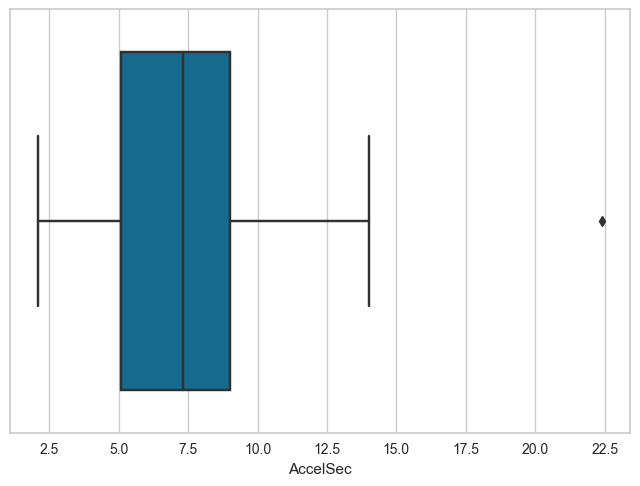

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



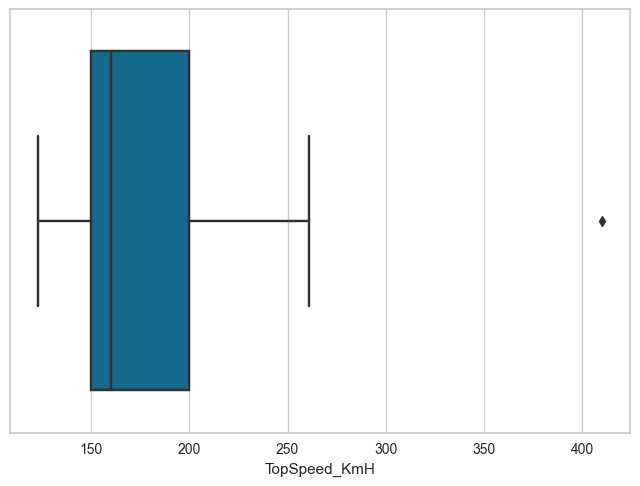

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



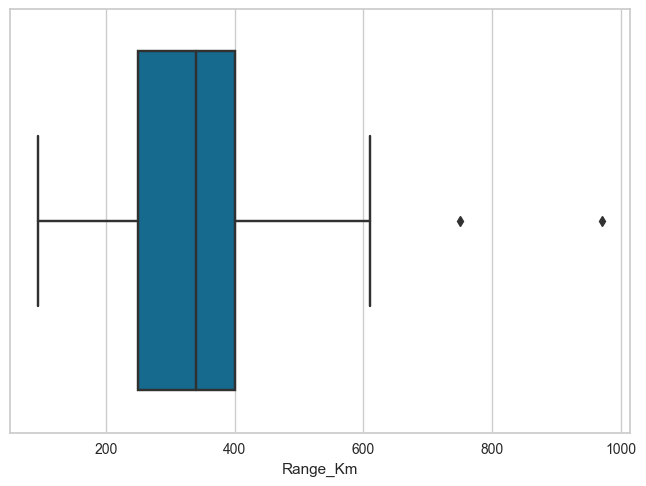

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



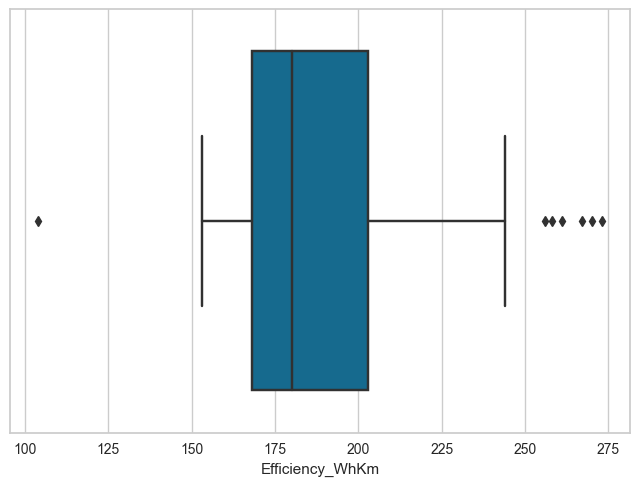

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



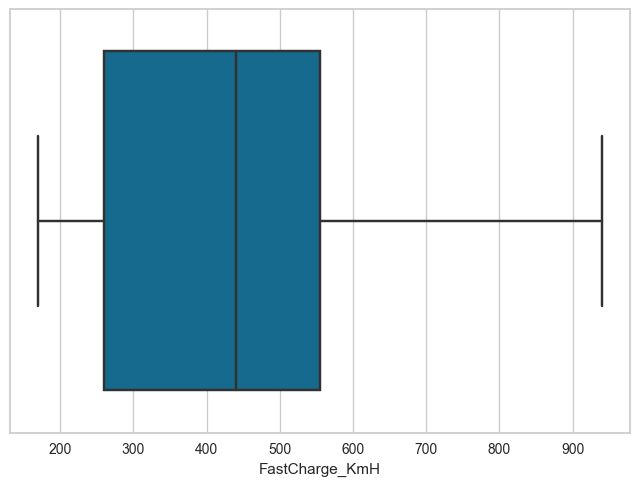

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



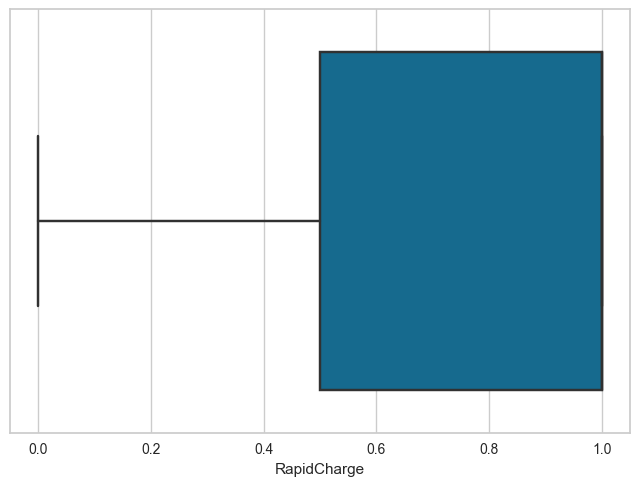

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



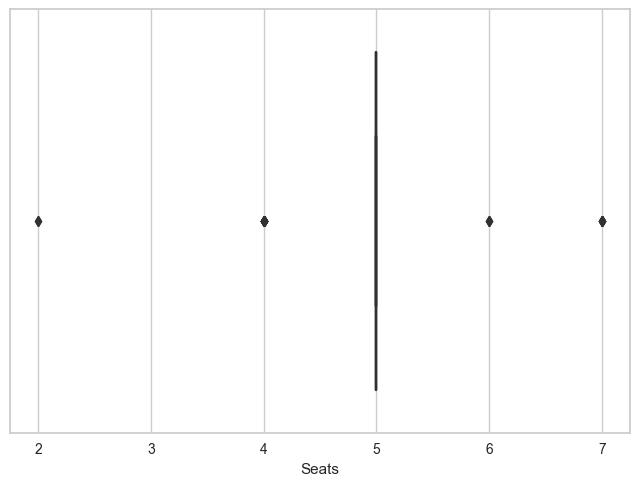

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



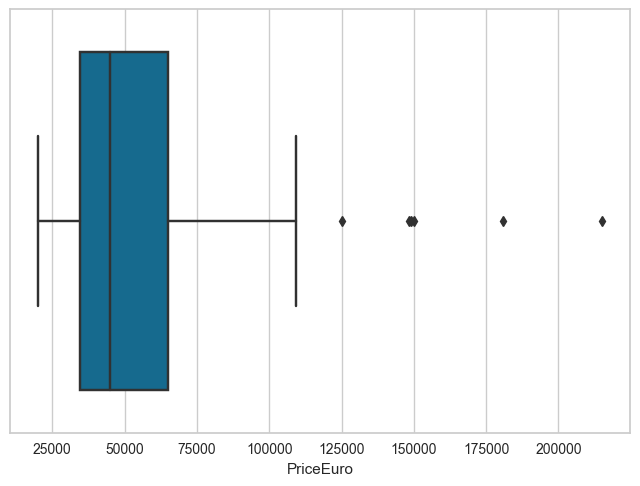

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



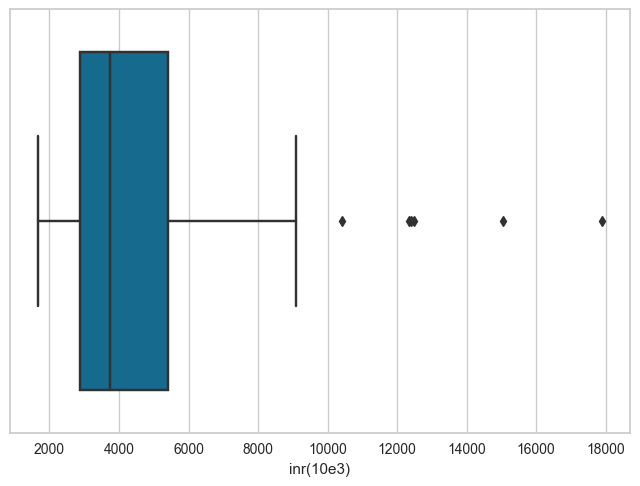

In [46]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

AccelSec
Skew: 1.2453093178396988


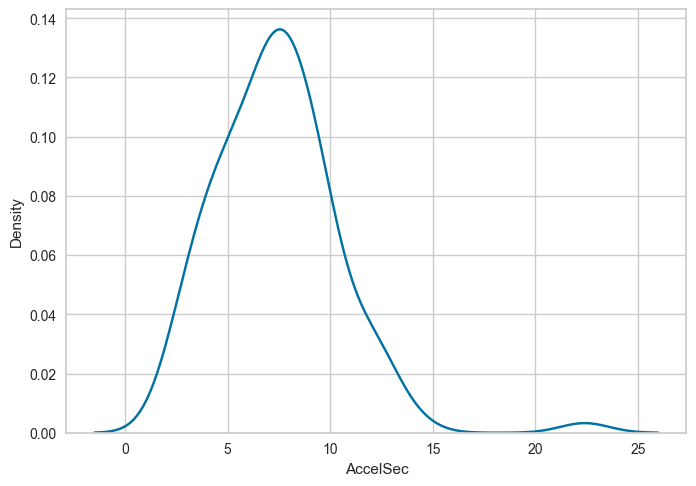

TopSpeed_KmH
Skew: 1.8998325707614065


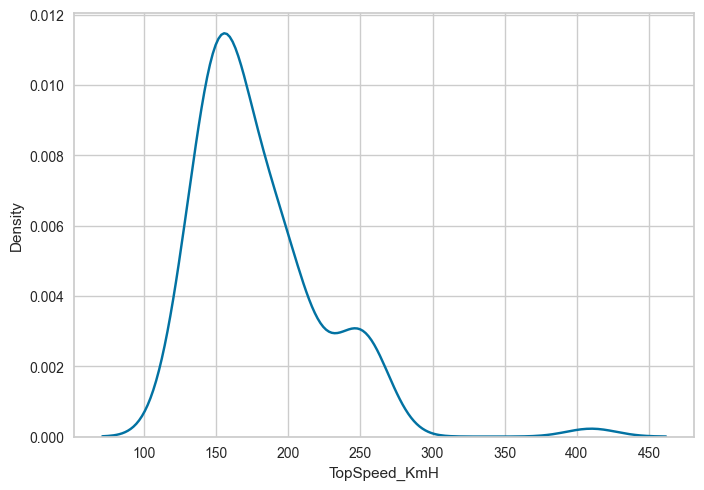

Range_Km
Skew: 1.3789602647774226


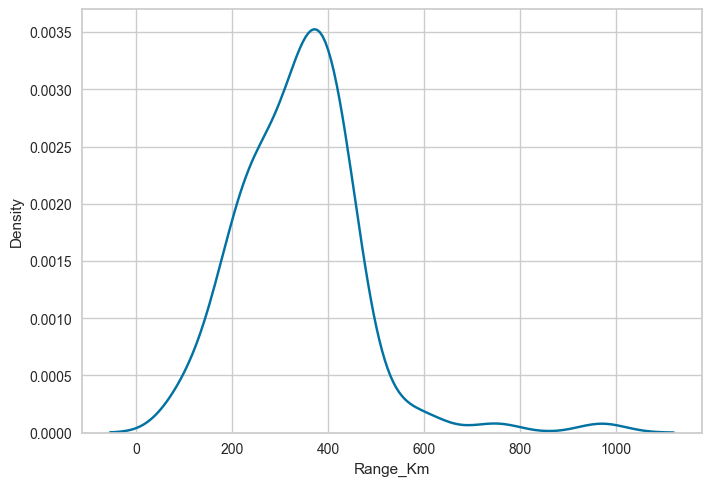

Efficiency_WhKm
Skew: 0.8715666148380815


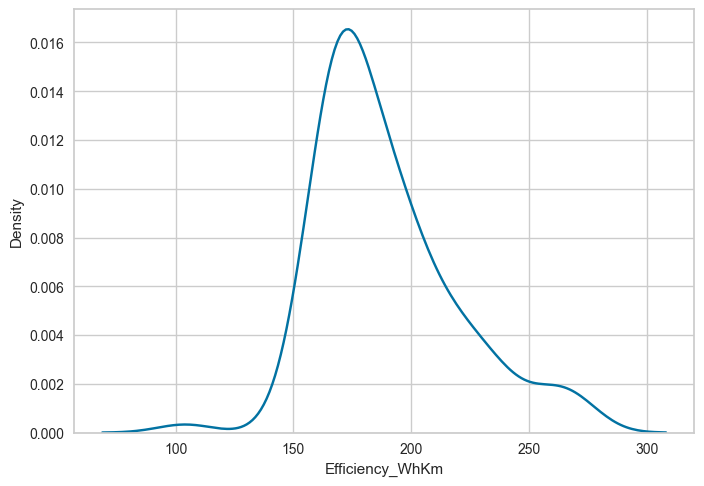

FastCharge_KmH
Skew: 0.6806986389825767


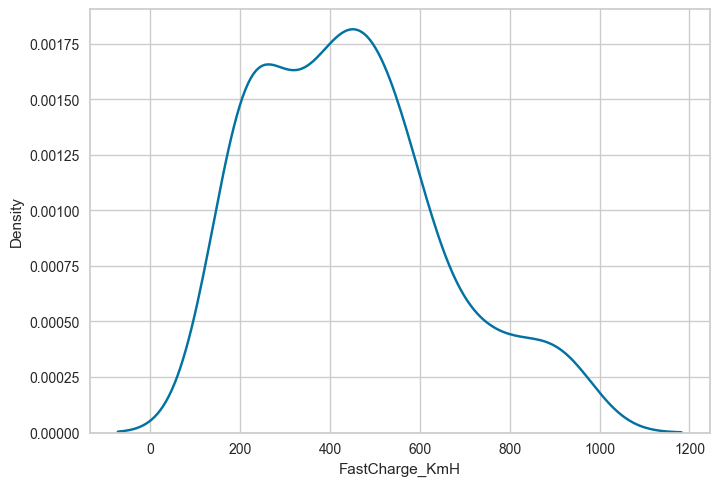

RapidCharge
Skew: -1.1567392282755464


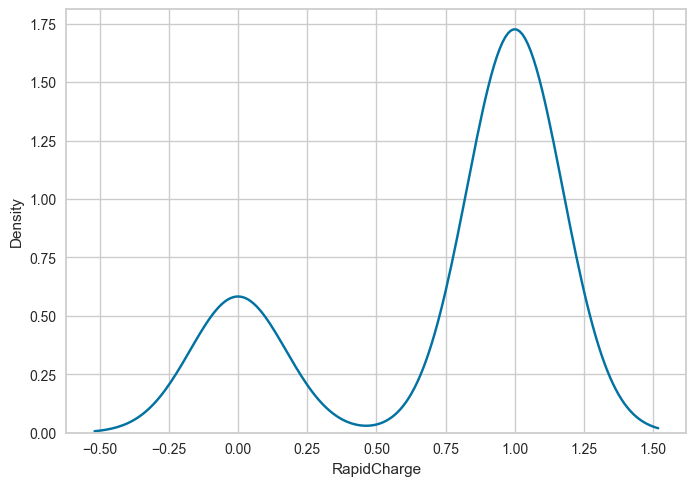

Seats
Skew: -0.024949345830334528


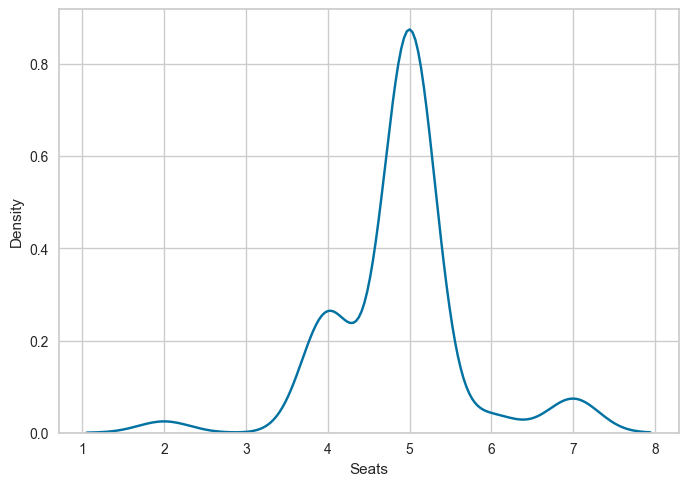

PriceEuro
Skew: 2.2219311943227185


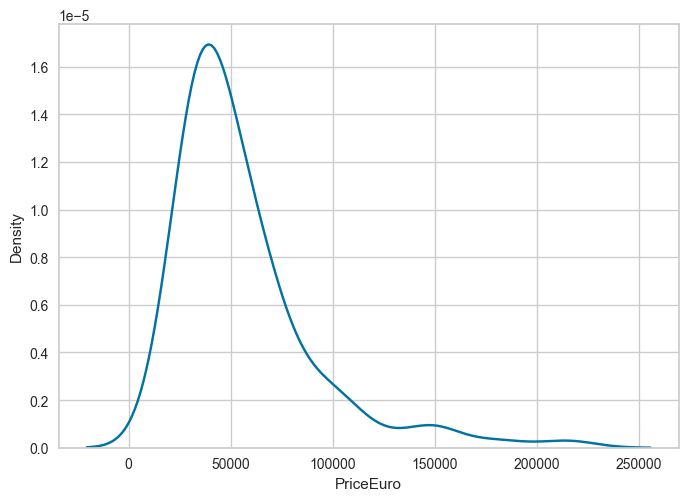

inr(10e3)
Skew: 2.2219311943227193


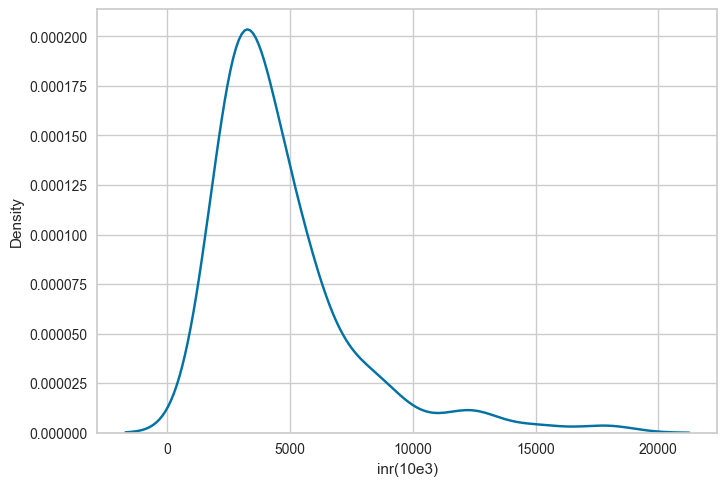

In [38]:
# Is the data normally distributed? Is it a defect? Why or why not?
for i in df.select_dtypes(include=np.number):
    print(i)
    sns.kdeplot(df[i])
    print('Skew:',df[i].skew())
    plt.show()

In [39]:
df.corr()

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
AccelSec           1.0000       -0.7862   -0.6771          -0.3829   
TopSpeed_KmH      -0.7862        1.0000    0.7467           0.3557   
Range_Km          -0.6771        0.7467    1.0000           0.3131   
Efficiency_WhKm   -0.3829        0.3557    0.3131           1.0000   
FastCharge_KmH    -0.7336        0.7852    0.7237           0.3219   
RapidCharge       -0.2925        0.2201    0.2519           0.0139   
Seats             -0.1753        0.1265    0.3002           0.3012   
PriceEuro         -0.6272        0.8291    0.6748           0.3967   
inr(10e3)         -0.6272        0.8291    0.6748           0.3967   

                 FastCharge_KmH  RapidCharge   Seats  PriceEuro  inr(10e3)  
AccelSec                -0.7336      -0.2925 -0.1753    -0.6272    -0.6272  
TopSpeed_KmH             0.7852       0.2201  0.1265     0.8291     0.8291  
Range_Km                 0.7237       0.2519  0.3002     0.6748     0.6748  
Efficiency_WhKm          0.3219       0.0139  0.3012     0.3967     0.3967  
FastCharge_KmH           1.0000       0.2259  0.1934     0.6679     0.6679  
RapidCharge              0.2259       1.0000  0.1967     0.1997     0.1997  
Seats                    0.1934       0.1967  1.0000     0.0209     0.0209  
PriceEuro                0.6679       0.1997  0.0209     1.0000     1.0000  
inr(10e3)                0.6679       0.1997  0.0209     1.0000     1.0000

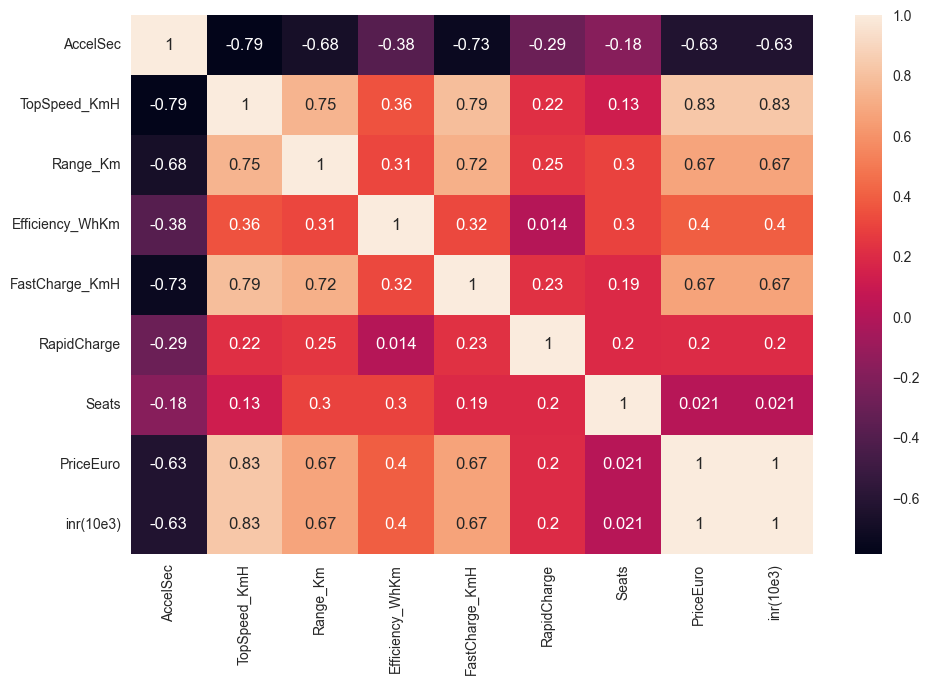

In [40]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

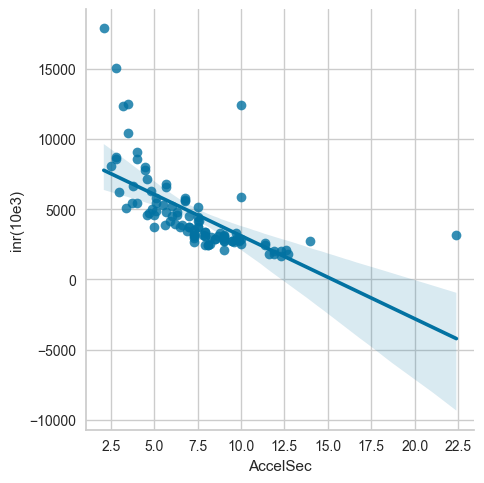

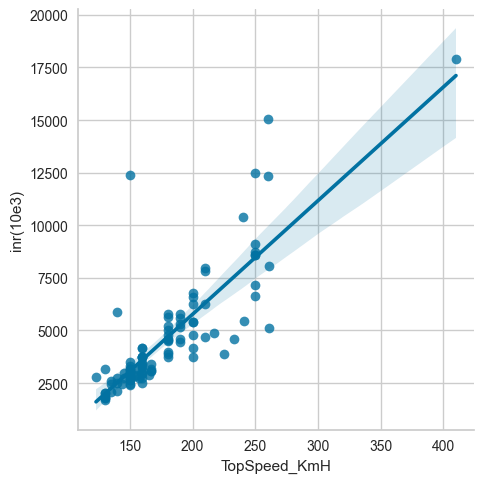

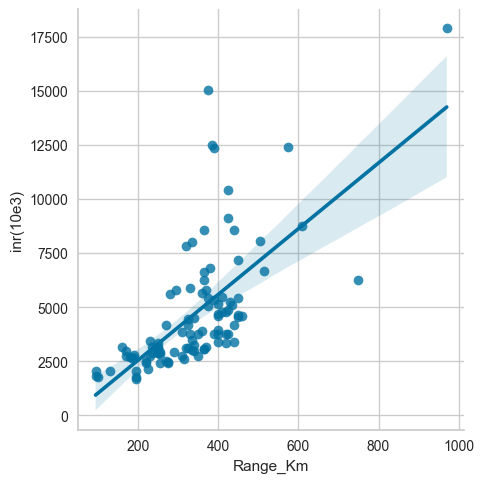

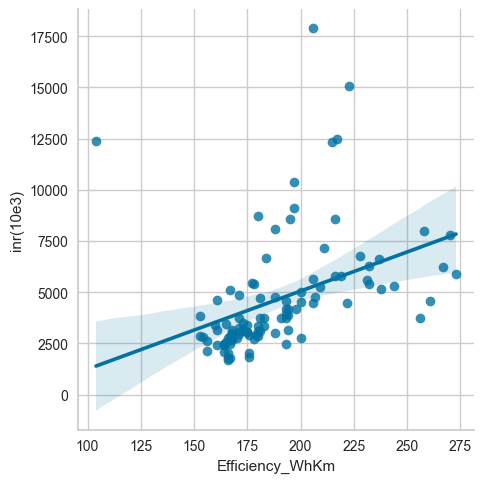

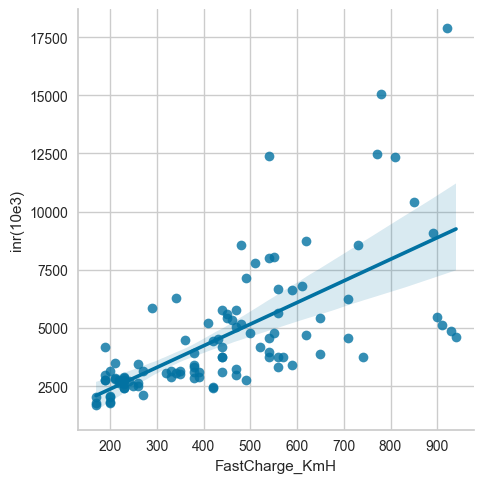

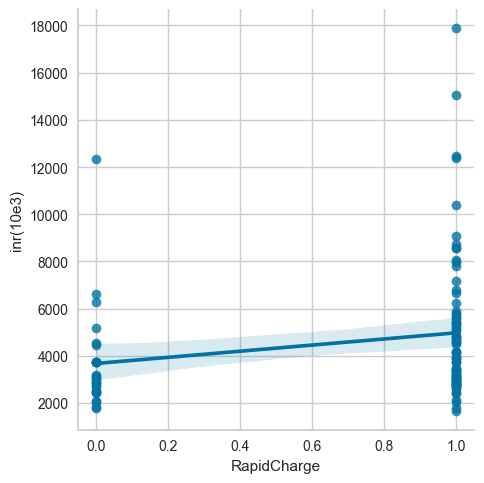

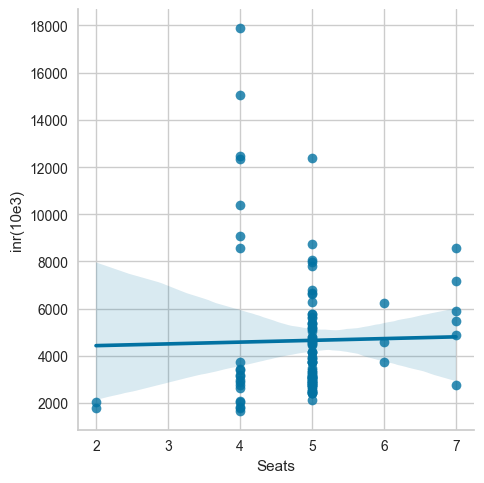

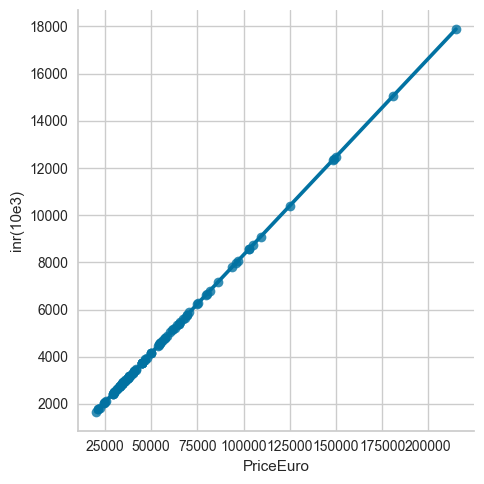

In [41]:
for i in df.select_dtypes(include=np.number):
    if i not in ['inr(10e3)']:
        sns.lmplot(data=df,x=i,y='inr(10e)3')
        plt.show()

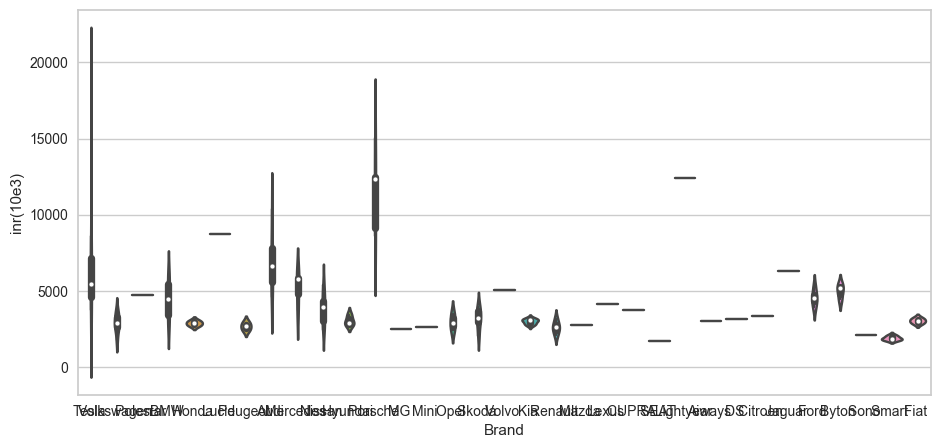

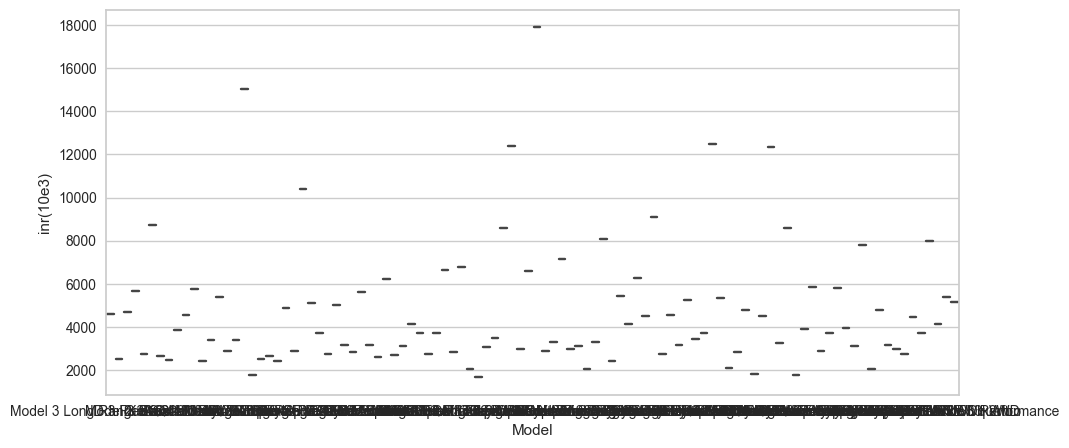

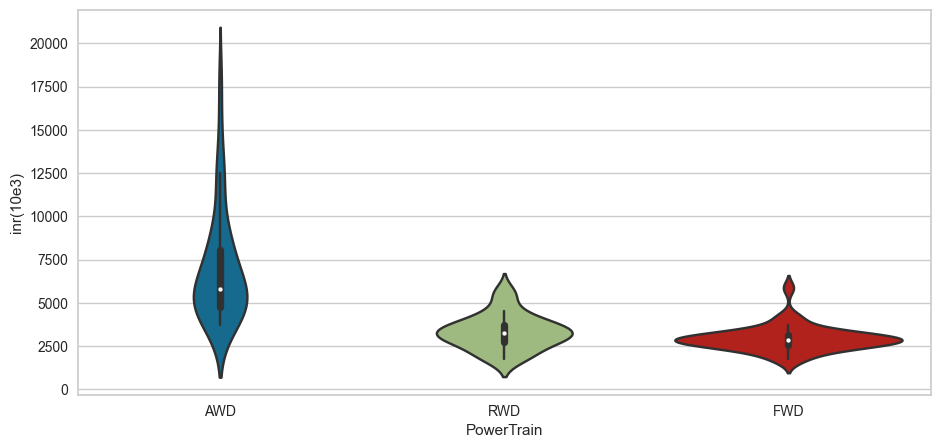

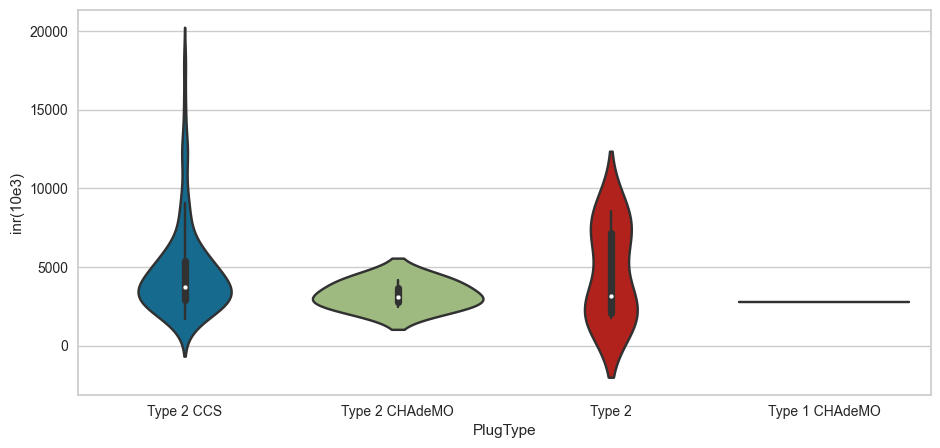

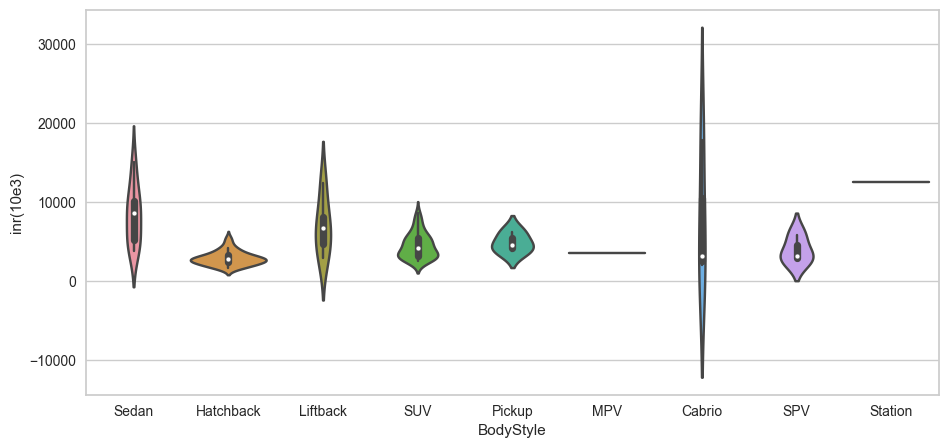

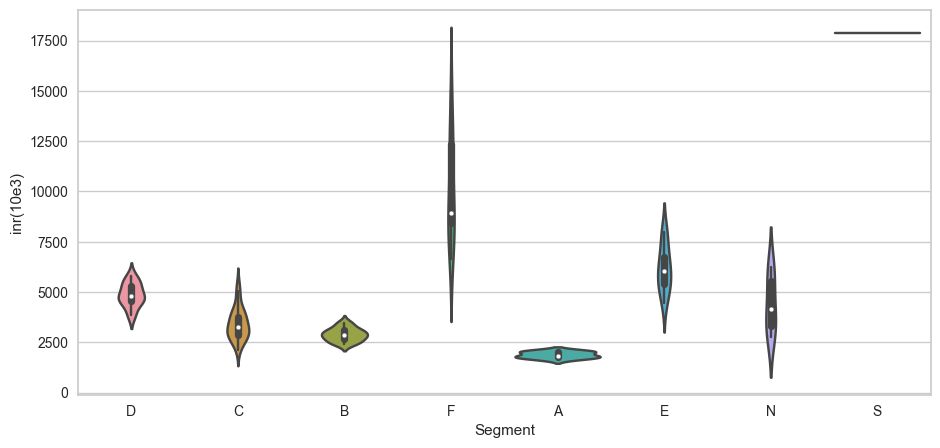

In [42]:
for i in df.select_dtypes(exclude=np.number):
    plt.figure(figsize=(11,5))
    sns.violinplot(data=df,x=i,y='inr(10e3)')
    plt.show()

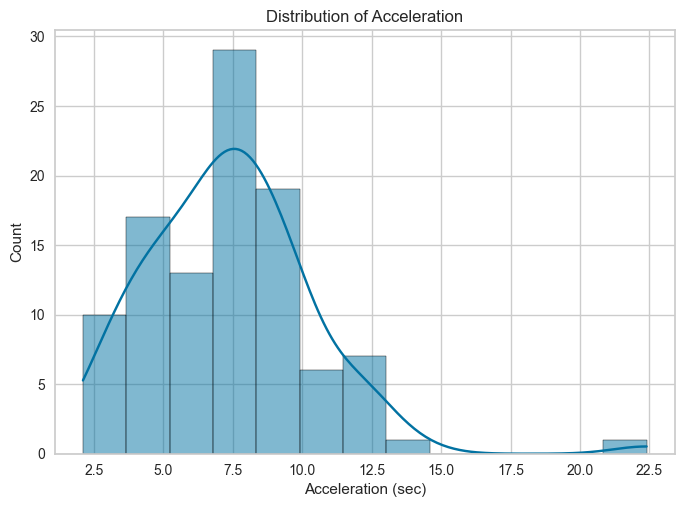

In [11]:
# Visualize the distribution of numerical features
sns.histplot(data=df, x='AccelSec', kde=True)
plt.xlabel('Acceleration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Acceleration')
plt.show()


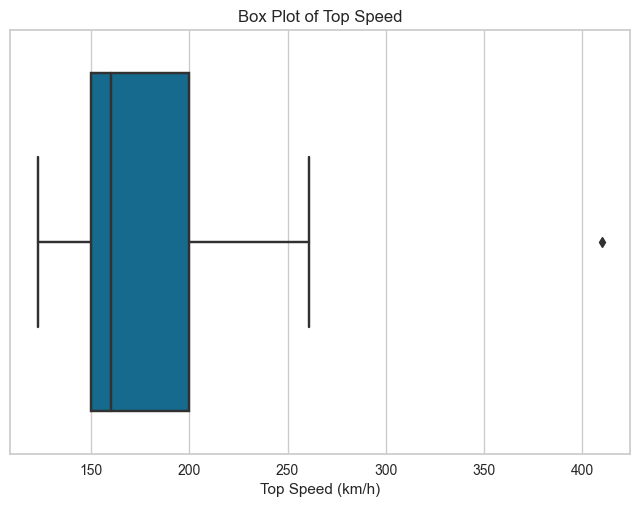

In [12]:
sns.boxplot(data=df, x='TopSpeed_KmH')
plt.xlabel('Top Speed (km/h)')
plt.title('Box Plot of Top Speed')
plt.show()


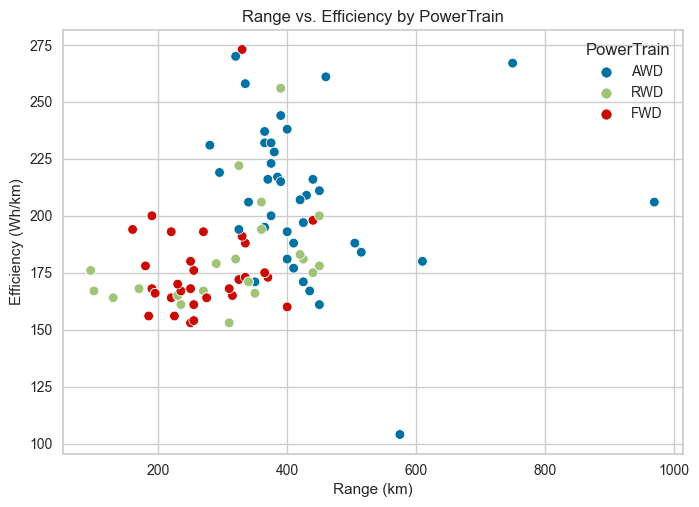

In [13]:
# Visualize the relationship between variables
sns.scatterplot(data=df, x='Range_Km', y='Efficiency_WhKm', hue='PowerTrain')
plt.xlabel('Range (km)')
plt.ylabel('Efficiency (Wh/km)')
plt.title('Range vs. Efficiency by PowerTrain')
plt.show()

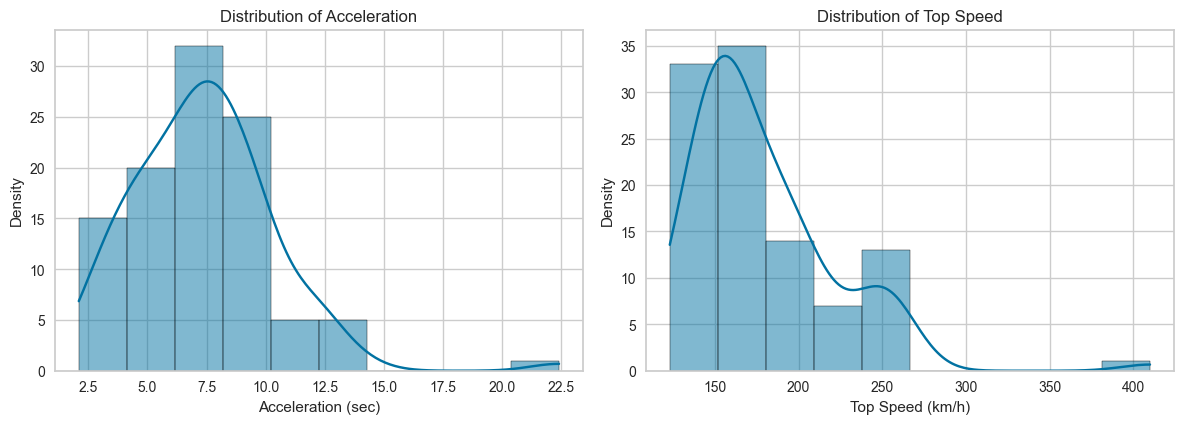

In [19]:
# Visualize the distribution of numerical features

# Histograms with KDE
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='AccelSec', kde=True, bins=10)
plt.xlabel('Acceleration (sec)')
plt.ylabel('Density')
plt.title('Distribution of Acceleration')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='TopSpeed_KmH', kde=True, bins=10)
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Density')
plt.title('Distribution of Top Speed')
plt.tight_layout()
plt.show()


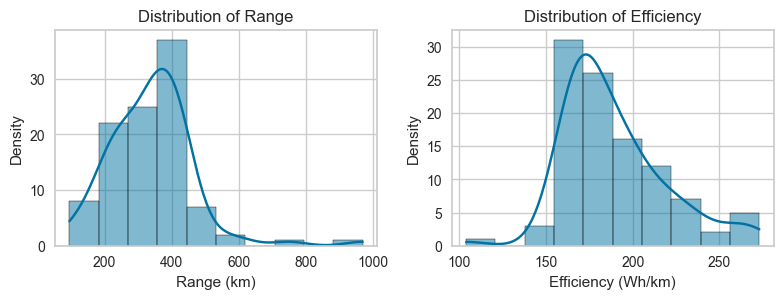

In [22]:
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Range_Km', kde=True, bins=10)
plt.xlabel('Range (km)')
plt.ylabel('Density')
plt.title('Distribution of Range')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Efficiency_WhKm', kde=True, bins=10)
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Density')
plt.title('Distribution of Efficiency')
plt.tight_layout()
plt.show()

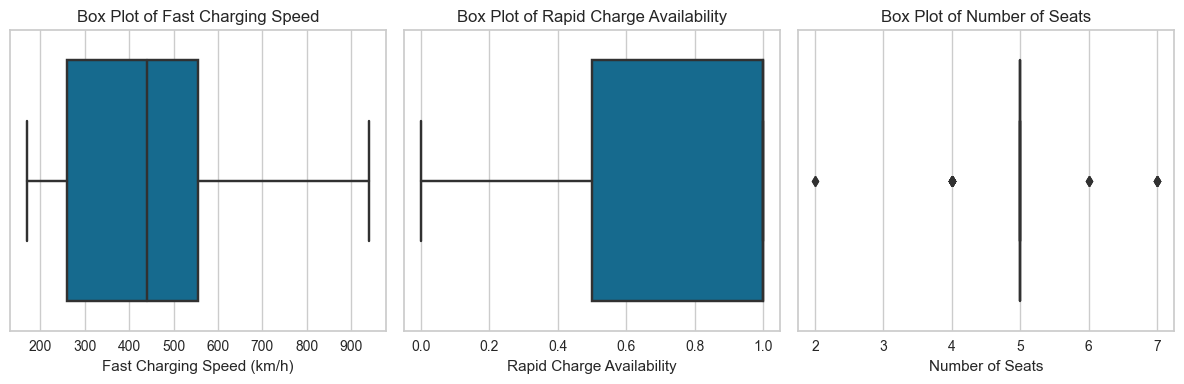

In [23]:

# Box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='FastCharge_KmH')
plt.xlabel('Fast Charging Speed (km/h)')
plt.title('Box Plot of Fast Charging Speed')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='RapidCharge')
plt.xlabel('Rapid Charge Availability')
plt.title('Box Plot of Rapid Charge Availability')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Seats')
plt.xlabel('Number of Seats')
plt.title('Box Plot of Number of Seats')

plt.tight_layout()
plt.show()


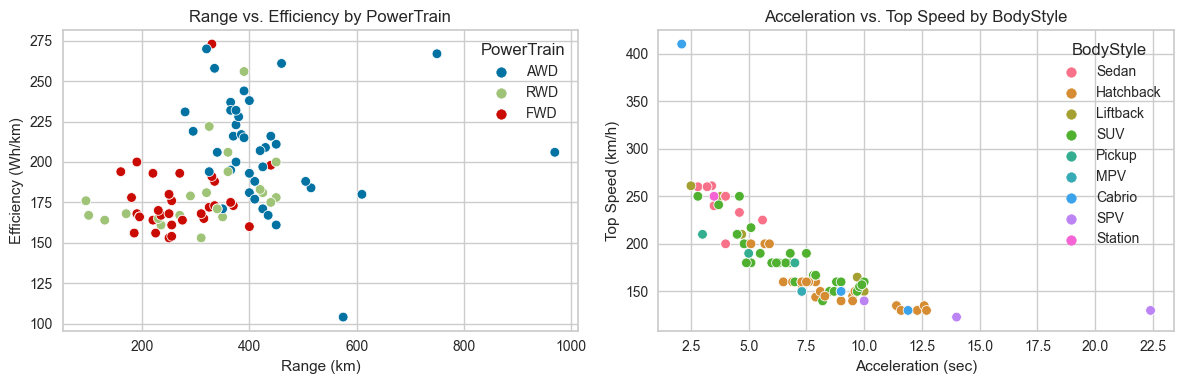

In [24]:

# Scatter plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Range_Km', y='Efficiency_WhKm', hue='PowerTrain')
plt.xlabel('Range (km)')
plt.ylabel('Efficiency (Wh/km)')
plt.title('Range vs. Efficiency by PowerTrain')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='AccelSec', y='TopSpeed_KmH', hue='BodyStyle')
plt.xlabel('Acceleration (sec)')
plt.ylabel('Top Speed (km/h)')
plt.title('Acceleration vs. Top Speed by BodyStyle')

plt.tight_layout()
plt.show()


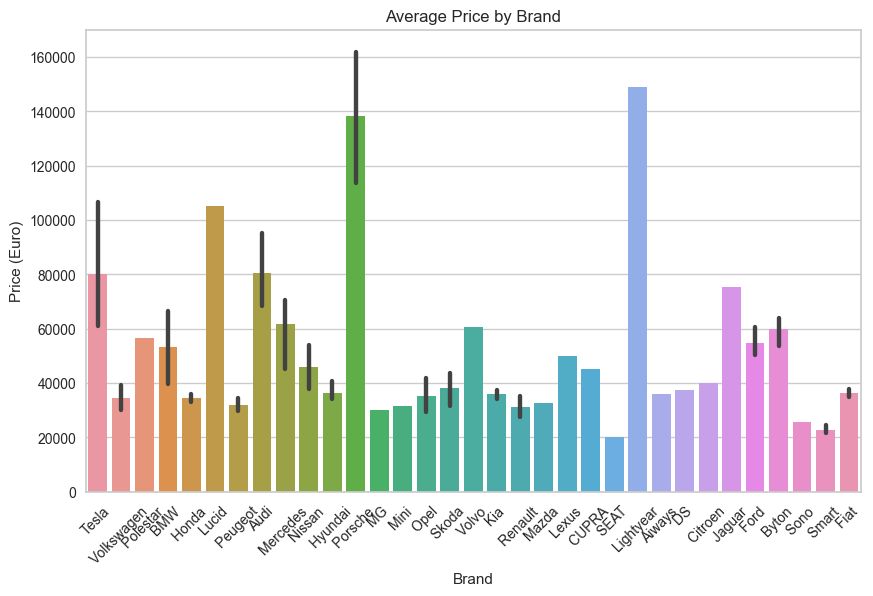

In [25]:
# Bar plots
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Brand', y='PriceEuro')
plt.xlabel('Brand')
plt.ylabel('Price (Euro)')
plt.title('Average Price by Brand')
plt.xticks(rotation=45)
plt.show()

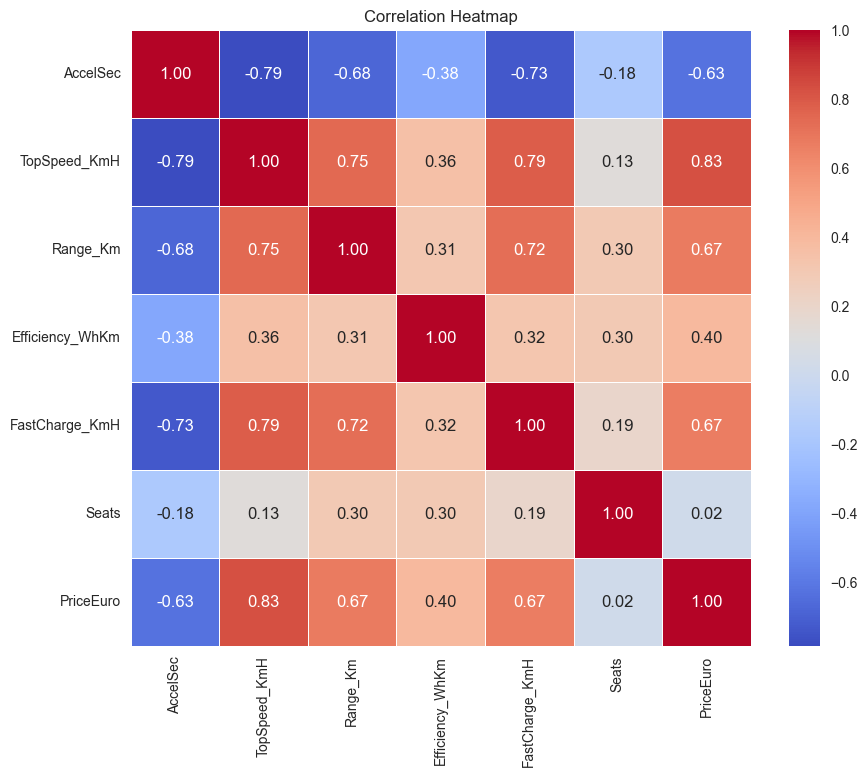

In [26]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
corr_matrix = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

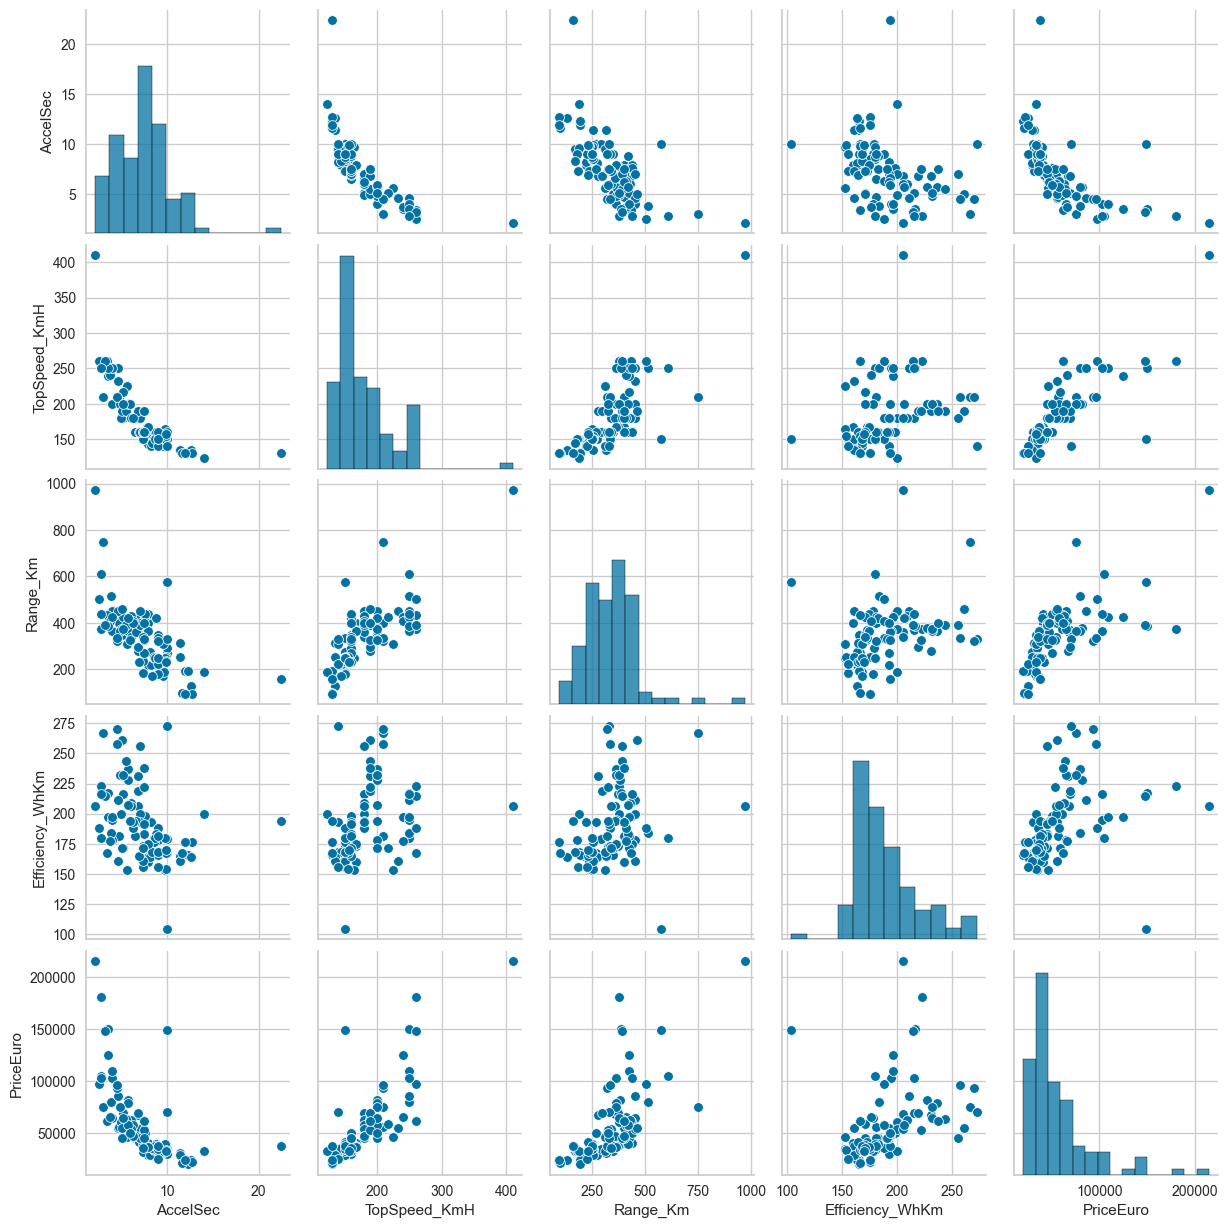

In [28]:
# Pair plot
sns.pairplot(df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceEuro']])
plt.show()

In [47]:
df1 = pd.get_dummies(df,drop_first=True)

In [54]:
df1

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
0      4.6000           233       450              161             940   
1     10.0000           160       270              167             250   
2      4.7000           210       400              181             620   
3      6.8000           180       360              206             560   
4      9.5000           145       170              168             190   
..        ...           ...       ...              ...             ...   
98     7.5000           160       330              191             440   
99     4.5000           210       335              258             540   
100    5.9000           200       325              194             440   
101    5.1000           200       375              232             450   
102    7.5000           190       400              238             480   

     RapidCharge  Seats  PriceEuro  inr(10e3)  Brand_Audi   ...  \
0              1      5      55480  4615.9360            0  ...   
1              0      5      30000  2496.0000            0  ...   
2              1      5      56440  4695.8080            0  ...   
3              1      5      68040  5660.9280            0  ...   
4              1      4      32997  2745.3504            0  ...   
..           ...    ...        ...        ...          ...  ...   
98             1      5      45000  3744.0000            0  ...   
99             1      5      96050  7991.3600            1  ...   
100            1      5      50000  4160.0000            0  ...   
101            1      5      65000  5408.0000            0  ...   
102            0      5      62000  5158.4000            0  ...   

     BodyStyle_SUV  BodyStyle_Sedan  BodyStyle_Station  Segment_B  Segment_C  \
0                0                1                  0          0          0   
1                0                0                  0          0          1   
2                0                0                  0          0          0   
3                1                0                  0          0          0   
4                0                0                  0          1          0   
..             ...              ...                ...        ...        ...   
98               0                0                  0          0          1   
99               1                0                  0          0          0   
100              0                0                  0          0          1   
101              0                0                  0          0          1   
102              1                0                  0          0          0   

     Segment_D  Segment_E  Segment_F  Segment_N  Segment_S  
0            1          0          0          0          0  
1            0          0          0          0          0  
2            1          0          0          0          0  
3            1          0          0          0          0  
4            0          0          0          0          0  
..         ...        ...        ...        ...        ...  
98           0          0          0          0          0  
99           0          1          0          0          0  
100          0          0          0          0          0  
101          0          0          0          0          0  
102          0          1          0          0          0  

[103 rows x 162 columns]

In [60]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']
#Finding out the linear regression using OLS method
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [64]:
#Fitting the model and summarizing
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.57e-24
Time:                        02:57:53   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.031e+05   2.38e+04     -4.324      0.000    -1.5e+05   -5.58e+04
AccelSec         1753.0004   1048.759      1.672      0.098    -328.769    3834.770
Range_Km           36.3000     22.629      1.604      0.112      -8.618      81.218
TopSpeed_KmH      581.7484     80.158      7.257      0.000     422.636     740.861
Efficiency_WhKm   117.6685     70.307      1.674      0.097     -21.890     257.227
RapidCharge      1465.5687   4496.958      0.326      0.745   -7460.822    1.04e+04
PowerTrain       5235.8309   2956.235      1.771      0.080    -632.248    1.11e+04
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72, 7), (31, 7), (72,), (31,))

# Statistical Test:

Null Hypothesis : The mean for the Train and the Mean of the Test are the same


Alternative Hypothesis : The Mean for the Train is not the same for the Test


In [70]:
from scipy import stats
t_stats , pvalues = stats.ttest_ind(x_train,x_test)
stats_test = pd.DataFrame(pvalues,x_train.columns,columns=['P_values'])
stats_test
(stats_test<0.05).any()

C:\Users\Harish\AppData\Local\Temp\ipykernel_13796\842965703.py:2: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



P_values    False
dtype: bool

In [71]:
stats_test.sort_values(by='P_values',ascending=False)

P_values
RapidCharge        0.9320
Efficiency_WhKm    0.8519
AccelSec           0.6469
PowerTrain         0.5547
TopSpeed_KmH       0.4359
Range_Km           0.2229
const                 NaN

In [72]:
stats.ttest_ind(x_train,x_test)[1]<0.05

C:\Users\Harish\AppData\Local\Temp\ipykernel_13796\1778580846.py:1: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



array([False, False, False, False, False, False, False])

# As all the p_values are greater than 0.05,We conclude that the null hypothesis is not rejected and the test is statistically representative of the train set in all the independent features.

In [73]:
import statsmodels.api as sma

In [75]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.3,random_state=12)
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((72, 7), (31, 7), (72,), (31,))

In [76]:
stats_model_1 = sma.OLS(y_train1,sma.add_constant(x_train1)).fit()
stats_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     36.79
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           4.42e-19
Time:                        03:05:34   Log-Likelihood:                -802.75
No. Observations:                  72   AIC:                             1620.
Df Residuals:                      65   BIC:                             1635.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.965e+04   2.53e+04     -3.150      0.002    -1.3e+05   -2.91e+04
AccelSec         1665.2458   1052.617      1.582      0.119    -436.975    3767.466
Range_Km           52.6632     24.355      2.162      0.034       4.023     101.304
TopSpeed_KmH      557.6917     88.762      6.283      0.000     380.421     734.962
Efficiency_WhKm     1.9721     75.545      0.026      0.979    -148.901     152.845
RapidCharge     -2023.1867   5154.706     -0.392      0.696   -1.23e+04    8271.472
PowerTrain       7171.0040   3466.369      2.069      0.043     248.187    1.41e+04
==============================================================================
Omnibus:                       55.667   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.646
Skew:                           2.238   Prob(JB):                     3.15e-66
Kurtosis:                      11.973   Cond. No.                     5.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
MLR_pvalues = pd.DataFrame(stats_model_1.pvalues,columns=['P-values'])
MLR_pvalues 

P-values
const              0.0025
AccelSec           0.1185
Range_Km           0.0343
TopSpeed_KmH       0.0000
Efficiency_WhKm    0.9793
RapidCharge        0.6960
PowerTrain         0.0426

In [78]:
Insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-values']>0.05]
isigni_var = Insignificant_var.index
isigni_var = isigni_var.to_list()
isigni_var

['AccelSec', 'Efficiency_WhKm', 'RapidCharge']

#The above ones are considered Insignificant and I have planned drop these and proceed Further and build a new named stats_model_with_significan

In [79]:
x_train2 = x_train1.drop(isigni_var,axis=1)
x_test2 = x_test1.drop(isigni_var,axis=1) 

In [80]:
stats_model_with_significant  = sma.OLS(y_train1,x_train2).fit()
stats_model_with_significant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     72.50
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           3.80e-21
Time:                        03:07:25   Log-Likelihood:                -804.41
No. Observations:                  72   AIC:                             1617.
Df Residuals:                      68   BIC:                             1626.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.252e+04   8846.508     -5.936      0.000   -7.02e+04   -3.49e+04
Range_Km        42.7563     23.599      1.812      0.074      -4.335      89.847
TopSpeed_KmH   495.9666     78.785      6.295      0.000     338.753     653.180
PowerTrain    6083.6234   3213.908      1.893      0.063    -329.631    1.25e+04
==============================================================================
Omnibus:                       58.928   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.276
Skew:                           2.345   Prob(JB):                     1.30e-79
Kurtosis:                      12.955   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = []
for i in range(x_train2.shape[1]):
    vif.append(variance_inflation_factor(x_train2.values,i))
pd.DataFrame({'Features':x_train2.columns,'VIF':vif})

Features     VIF
0         const 17.9631
1      Range_Km  2.5205
2  TopSpeed_KmH  3.0081
3    PowerTrain  1.5147

In [84]:
vif = []
for i in range(x_train1.shape[1]):
    vif.append(variance_inflation_factor(x_train1.values,i))
pd.DataFrame({'Features':x_train1.columns,'VIF':vif})

Features      VIF
0            const 146.9069
1         AccelSec   2.7810
2         Range_Km   2.6869
3     TopSpeed_KmH   3.8215
4  Efficiency_WhKm   1.3284
5      RapidCharge   1.2246
6       PowerTrain   1.7636

In [85]:
x_train3 = x_train1.drop(columns='const',axis=1)
x_test3 = x_test1.drop(columns='const',axis=1)

In [86]:
stats_model_without_vif1  = sma.OLS(y_train1,x_train3).fit()
stats_model_without_vif1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PriceEuro   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              143.1
Date:                Sat, 08 Jul 2023   Prob (F-statistic):                    7.58e-36
Time:                        03:12:51   Log-Likelihood:                         -807.86
No. Observations:                  72   AIC:                                      1628.
Df Residuals:                      66   BIC:                                      1641.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
AccelSec        -1001.4267    666.419     -1.503      0.138   -2331.976     329.122
Range_Km           50.3577     25.937      1.942      0.056      -1.428     102.143
TopSpeed_KmH      397.8132     77.582      5.128      0.000     242.915     552.711
Efficiency_WhKm  -145.9231     63.053     -2.314      0.024    -271.813     -20.034
RapidCharge     -6927.4482   5235.509     -1.323      0.190   -1.74e+04    3525.583
PowerTrain       9334.8796   3619.959      2.579      0.012    2107.398    1.66e+04
==============================================================================
Omnibus:                       33.862   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.461
Skew:                           1.554   Prob(JB):                     3.37e-18
Kurtosis:                       7.142   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
x_train4 = x_train2.drop(columns='TopSpeed_KmH',axis=1)
x_test4 = x_test2.drop(columns='TopSpeed_KmH',axis=1)

In [88]:
stats_model_without_vif1_for_model2  = sma.OLS(y_train1,x_train4).fit()
stats_model_without_vif1_for_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     57.02
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           2.41e-15
Time:                        03:34:48   Log-Likelihood:                -820.94
No. Observations:                  72   AIC:                             1648.
Df Residuals:                      69   BIC:                             1655.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9011.6334   6897.447     -1.307      0.196   -2.28e+04    4748.398
Range_Km     147.4432     20.912      7.051      0.000     105.724     189.162
PowerTrain  1.423e+04   3673.829      3.875      0.000    6905.227    2.16e+04
==============================================================================
Omnibus:                       20.008   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.112
Skew:                           1.085   Prob(JB):                     2.89e-07
Kurtosis:                       5.308   Cond. No.                         976.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score

In [98]:
def print_metrics(model,key,ans):
    print(model)
    print('\n')
    print('Confusion Matrix: ')
    print(confusion_matrix(key,ans))
    print('-----------------------------------------------------')
    print('Classification Report: ')
    print(classification_report(key,ans))
    print('-------------------------------------------------------')
    print('Cohen_kappa_score: ',cohen_kappa_score(key,ans))
    print('\n\n')

In [99]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)
print_metrics('Logistic Regression Base Model Train',y_train,y_pred_lr_train)
print_metrics('Logistic Regression Base Model Test',y_train,y_pred_lr_train)

Logistic Regression Base Model Train


Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
-----------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

       20129       0.00      0.00      0.00         1
       21421       0.00      0.00      0.00         1
       22030       1.00      1.00      1.00         1
       24534       0.33      1.00      0.50         1
       24790       1.00      1.00      1.00         1
       29146       0.33      1.00      0.50         1
       29234       0.00      0.00      0.00         2
       29682       0.50      1.00      0.67         1
       30000       0.00      0.00      0.00         2
       31184       1.00      1.00      1.00         1
       31681       1.00      1.00      1.00         1
       32646       1.00      1.00      1.00         1
       32997       1.00      1.00      1.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

In [101]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
rfe = RFE(lr,n_features_to_select=4)
rfe.fit(x_train,y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Harish\anaconda3\lib\site-packa

[('const', False, 4),
 ('AccelSec', True, 1),
 ('Range_Km', True, 1),
 ('TopSpeed_KmH', True, 1),
 ('Efficiency_WhKm', True, 1),
 ('RapidCharge', False, 3),
 ('PowerTrain', False, 2)]

In [102]:
x_train_rfe = x_train.drop('PowerTrain',axis=1)
x_test_rfe = x_test.drop('PowerTrain',axis=1)

In [103]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train_rfe,y_train)
y_pred_lr_train = lr.predict(x_train_rfe)
y_pred_lr_test = lr.predict(x_test_rfe)
print_metrics('Logistic Regression RFE Model Train',y_train,y_pred_lr_train)
print_metrics('Logistic Regression RFE Model Test',y_train,y_pred_lr_train)

Logistic Regression RFE Model Train


Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
-----------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

       20129       0.00      0.00      0.00         1
       21421       0.00      0.00      0.00         1
       22030       1.00      1.00      1.00         1
       24534       0.33      1.00      0.50         1
       24790       1.00      1.00      1.00         1
       29146       0.50      1.00      0.67         1
       29234       0.00      0.00      0.00         2
       29682       0.50      1.00      0.67         1
       30000       0.00      0.00      0.00         2
       31184       1.00      1.00      1.00         1
       31681       1.00      1.00      1.00         1
       32646       1.00      1.00      1.00         1
       32997       1.00      1.00      1.0

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
de1 = DecisionTreeClassifier()
de1.fit(x_train_rfe,y_train)
y_pred_lr_train = de1.predict(x_train_rfe)
y_pred_lr_test = de1.predict(x_test_rfe)
print_metrics('DecisionTree classifier RFE Model Train',y_train,y_pred_lr_train)
print_metrics('DecisionTree classifier RFE Model Test',y_train,y_pred_lr_train)

DecisionTree classifier RFE Model Train


Confusion Matrix: 
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
-----------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

       20129       0.50      1.00      0.67         1
       21421       1.00      1.00      1.00         1
       22030       1.00      1.00      1.00         1
       24534       0.00      0.00      0.00         1
       24790       1.00      1.00      1.00         1
       29146       1.00      1.00      1.00         1
       29234       1.00      1.00      1.00         2
       29682       1.00      1.00      1.00         1
       30000       1.00      1.00      1.00         2
       31184       1.00      1.00      1.00         1
       31681       1.00      1.00      1.00         1
       32646       1.00      1.00      1.00         1
       32997       1.00      1.00     

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [106]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier

In [107]:
de = RandomForestClassifier()
de.fit(x_train_rfe,y_train)
y_pred_lr_train = de.predict(x_train_rfe)
y_pred_lr_test = de.predict(x_test_rfe)
print_metrics('RandomForest classifier RFE Model Train',y_train,y_pred_lr_train)
print_metrics('RandomForest classifier RFE Model Test',y_train,y_pred_lr_train)

RandomForest classifier RFE Model Train


Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
-----------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

       20129       0.00      0.00      0.00         1
       21421       1.00      1.00      1.00         1
       22030       1.00      1.00      1.00         1
       24534       0.50      1.00      0.67         1
       24790       1.00      1.00      1.00         1
       29146       1.00      1.00      1.00         1
       29234       1.00      1.00      1.00         2
       29682       1.00      1.00      1.00         1
       30000       1.00      1.00      1.00         2
       31184       1.00      1.00      1.00         1
       31681       1.00      1.00      1.00         1
       32646       1.00      1.00      1.00         1
       32997       1.00      1.00     

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [108]:
be = BaggingClassifier()
be.fit(x_train_rfe,y_train)
y_pred_lr_train = be.predict(x_train_rfe)
y_pred_lr_test = be.predict(x_test_rfe)
print_metrics('Bagging classifier RFE Model Train',y_train,y_pred_lr_train)
print_metrics('Bagging classifier RFE Model Test',y_train,y_pred_lr_train)

Bagging classifier RFE Model Train


Confusion Matrix: 
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
-----------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

       20129       0.50      1.00      0.67         1
       21421       1.00      1.00      1.00         1
       22030       1.00      1.00      1.00         1
       24534       0.00      0.00      0.00         1
       24790       1.00      1.00      1.00         1
       29146       1.00      1.00      1.00         1
       29234       1.00      1.00      1.00         2
       29682       1.00      1.00      1.00         1
       30000       1.00      1.00      1.00         2
       31184       1.00      1.00      1.00         1
       31681       1.00      1.00      1.00         1
       32646       1.00      1.00      1.00         1
       32997       1.00      1.00      1.00

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [109]:
ada = AdaBoostClassifier()
ada.fit(x_train_rfe,y_train)
y_pred_lr_train = ada.predict(x_train_rfe)
y_pred_lr_test = ada.predict(x_test_rfe)
print_metrics('AdaBoost classifier RFE Model Train',y_train,y_pred_lr_train)
print_metrics('AdaBoost classifier RFE Model Test',y_train,y_pred_lr_train)

AdaBoost classifier RFE Model Train


Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-----------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

       20129       0.00      0.00      0.00         1
       21421       0.25      1.00      0.40         1
       22030       1.00      1.00      1.00         1
       24534       0.50      1.00      0.67         1
       24790       1.00      1.00      1.00         1
       29146       0.00      0.00      0.00         1
       29234       0.40      1.00      0.57         2
       29682       0.00      0.00      0.00         1
       30000       0.14      1.00      0.25         2
       31184       0.00      0.00      0.00         1
       31681       1.00      1.00      1.00         1
       32646       0.00      0.00      0.00         1
       32997       0.00      0.00      0.0

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [110]:
de = RandomForestClassifier()
de.fit(x_train_rfe,y_train)
y_pred_lr_train = de.predict(x_train_rfe)
y_pred_lr_test = de.predict(x_test_rfe)
print_metrics('RandomForest classifier RFE Model Train',y_train,y_pred_lr_train)
print_metrics('RandomForest classifier RFE Model Test',y_train,y_pred_lr_train)

RandomForest classifier RFE Model Train


Confusion Matrix: 
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
-----------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

       20129       0.50      1.00      0.67         1
       21421       1.00      1.00      1.00         1
       22030       1.00      1.00      1.00         1
       24534       0.00      0.00      0.00         1
       24790       1.00      1.00      1.00         1
       29146       1.00      1.00      1.00         1
       29234       1.00      1.00      1.00         2
       29682       1.00      1.00      1.00         1
       30000       1.00      1.00      1.00         2
       31184       1.00      1.00      1.00         1
       31681       1.00      1.00      1.00         1
       32646       1.00      1.00      1.00         1
       32997       1.00      1.00     

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [115]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [116]:
#Finding out the R-squared value
r2=(r2_score(y_test,pred))
print(r2*100)


81.8007933229099


In [117]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [118]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)



In [119]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

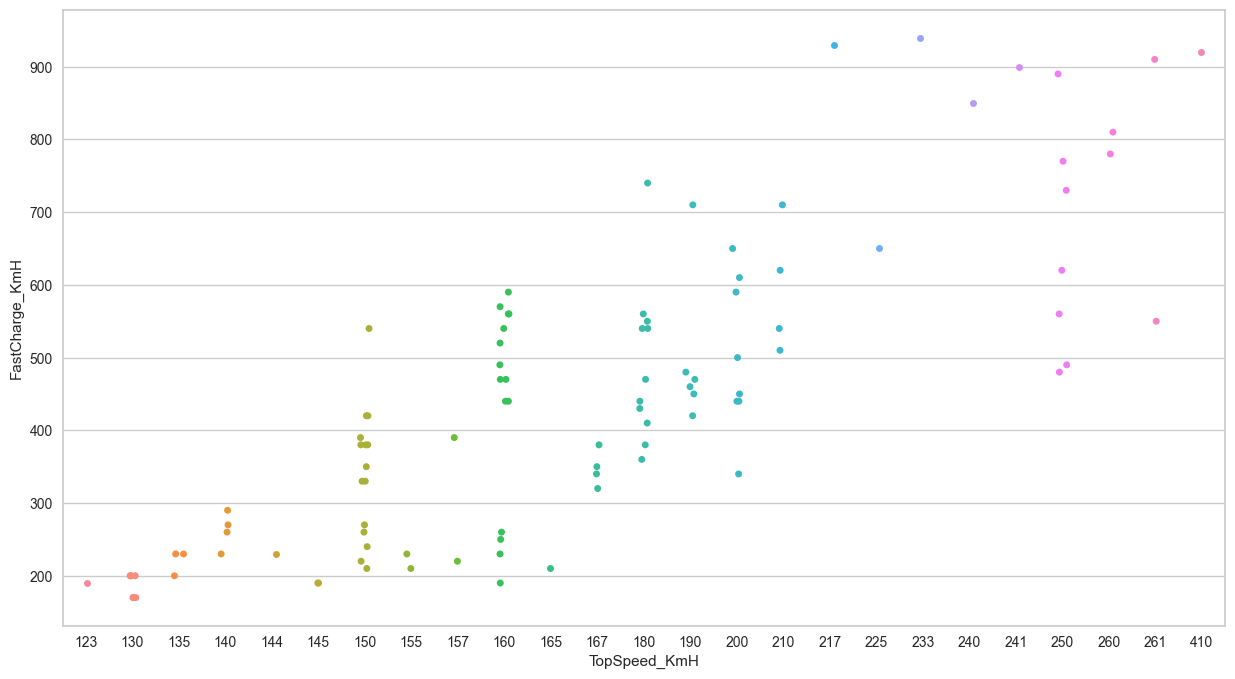

In [125]:
#CLUSTERING

ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)


In [120]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  6],
       [ 0, 15]], dtype=int64)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

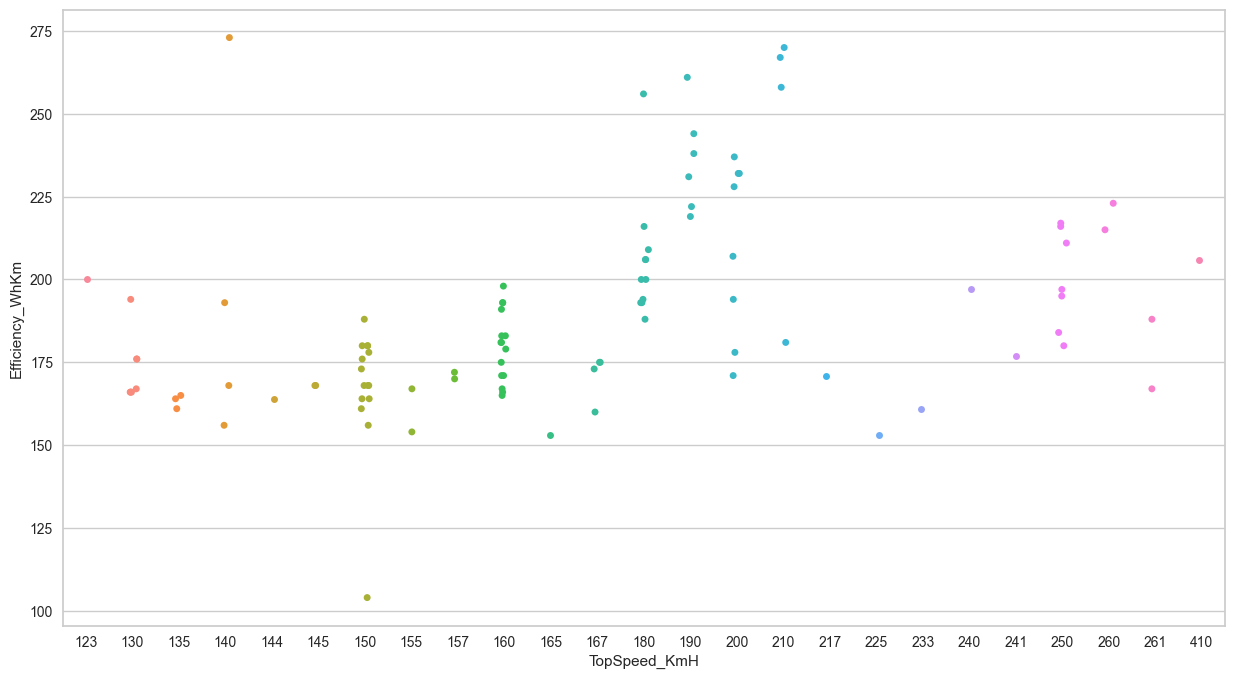

In [127]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [128]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [131]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data_2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data_2

PC1     PC2     PC3     PC4     Pc5     PC6     PC7     PC8     PC9
0    2.4292 -0.5546 -1.1478 -0.8828  0.8400 -0.9593  0.9989  0.7111 -0.3967
1   -2.3225 -0.3454  0.8965 -1.3055  0.0796  0.2351 -0.2137 -0.5441 -0.1819
2    1.5879  0.0089 -0.6505  0.0410  0.5935 -0.6982  0.0587  0.2488 -0.2028
3    0.2910 -0.0001 -0.3077 -0.5142 -1.6089  0.2916  0.3650 -0.2355  0.2617
4   -2.6027 -0.6265 -0.8881  0.5853 -0.8021  0.0274 -0.0850 -0.5078 -0.0499
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
98  -0.2972  0.4467 -0.4636  0.1025 -0.3460 -0.1005  0.0311  0.2023  0.1454
99   2.3350  0.6307  0.9859  1.5601 -0.8173 -0.1219  0.1641 -0.2557  0.1410
100  0.7806  0.4268 -0.2986  0.7086  0.4817 -0.5401 -0.1398 -0.0487 -0.3675
101  1.5409  0.6988  0.4224  1.0949 -0.2981 -0.3080 -0.3632  0.1273 -0.1904
102  0.9151  0.2615  2.4106  0.1880  0.3408  0.0156 -0.1719  0.5676 -0.2008

[103 rows x 9 columns]

In [132]:
df_7=data2.iloc[:,:9]
df_7.head(3)

PC1     PC2     PC3     PC4    Pc5     PC6     PC7     PC8     PC9
0  2.4292 -0.5546 -1.1478 -0.8828 0.8400 -0.9593  0.9989  0.7111 -0.3967
1 -2.3225 -0.3454  0.8965 -1.3055 0.0796  0.2351 -0.2137 -0.5441 -0.1819
2  1.5879  0.0089 -0.6505  0.0410 0.5935 -0.6982  0.0587  0.2488 -0.2028

In [133]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8  \
variable                                                                   
PC1      -0.3964  0.0862  0.0648  0.0583  0.1445  0.6769  0.4125  0.2707   
PC2       0.4220 -0.2168  0.0023 -0.0685  0.0382  0.0452  0.0376 -0.4138   
PC3       0.2383  0.3309  0.5718  0.3805 -0.5751  0.0249  0.0047  0.1442   
PC4       0.3945 -0.1384 -0.0477 -0.2965 -0.0924 -0.2379  0.7282  0.3584   
Pc5       0.1572  0.2699 -0.8033  0.3953 -0.2926  0.0870  0.0539  0.0408   
PC6       0.3895 -0.0247 -0.0763 -0.3871 -0.0328  0.3645 -0.5208  0.5342   
PC7       0.1404  0.8013  0.0195 -0.4290  0.1653  0.0867  0.0984 -0.3208   
PC8       0.3898 -0.2623  0.0738  0.1799  0.0433  0.5587  0.1180 -0.3821   
PC9       0.3229  0.1805  0.0983  0.4866  0.7228 -0.1499 -0.0191  0.2653   

             PC9  
variable          
PC1      -0.3246  
PC2      -0.7708  
PC3      -0.0990  
PC4       0.1057  
Pc5      -0.0561  
PC6      -0.0380  
PC7       0.0800  
PC8       0.5172  
PC9      -0.0333

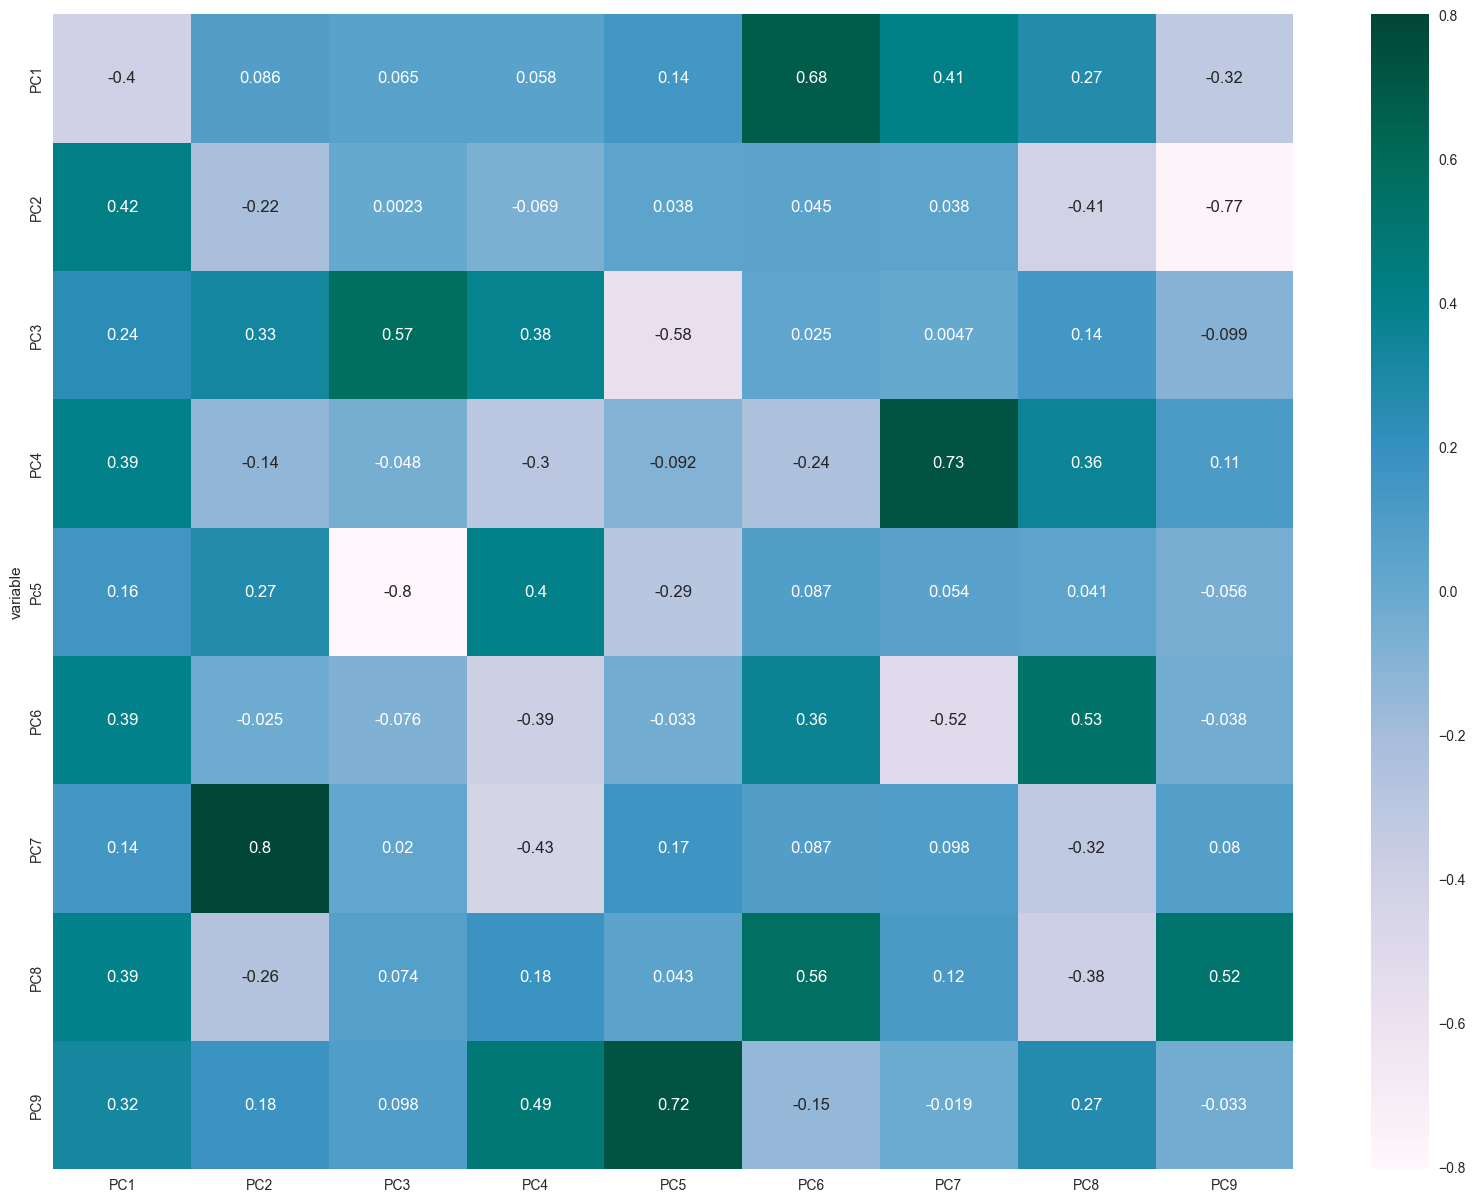

In [137]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='PuBuGn')
plt.show()

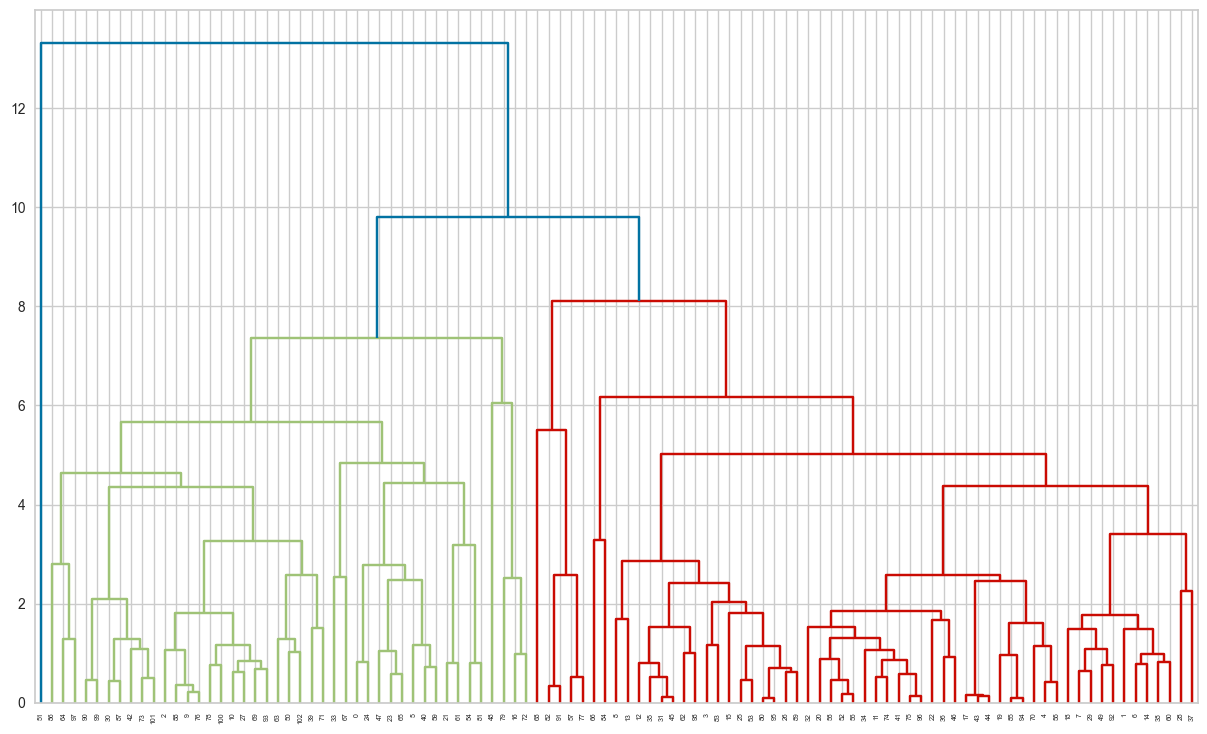

In [139]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(15, 9))
dendrogram(linked, orientation='top')
plt.show()

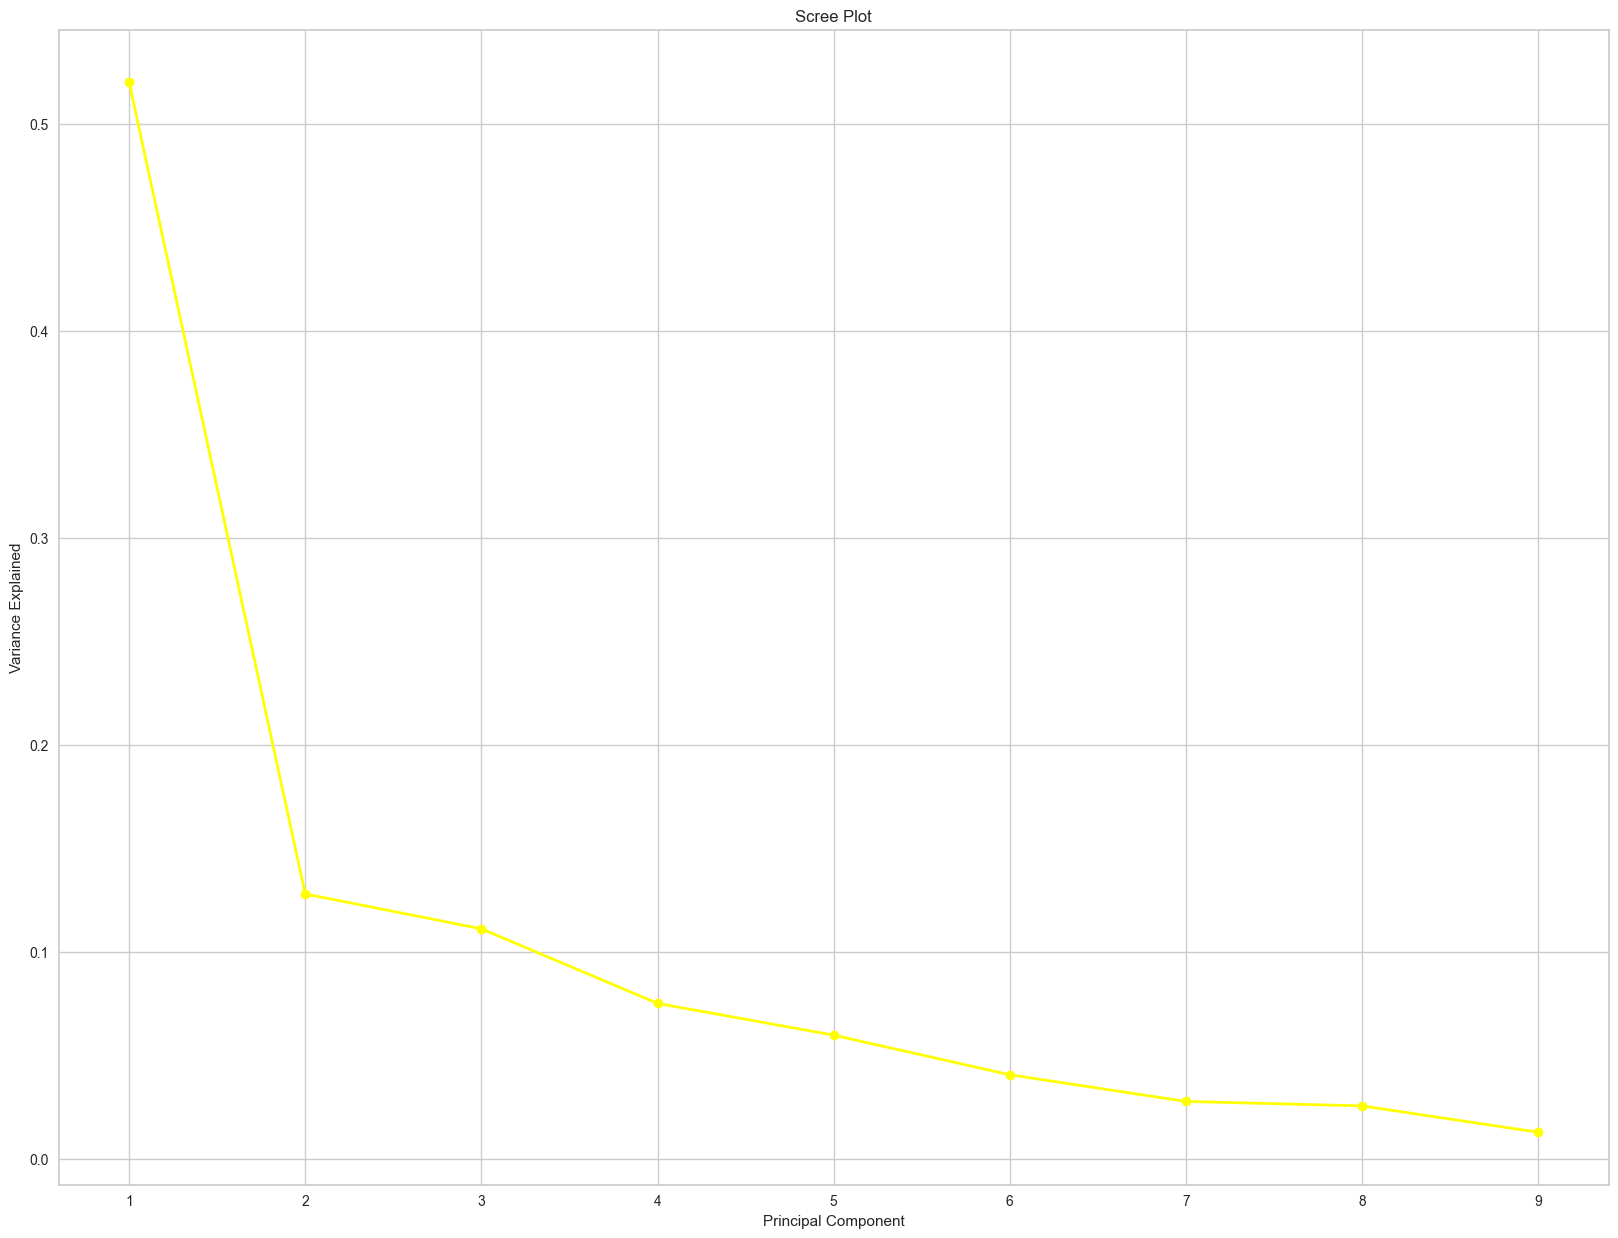

In [141]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='yellow')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

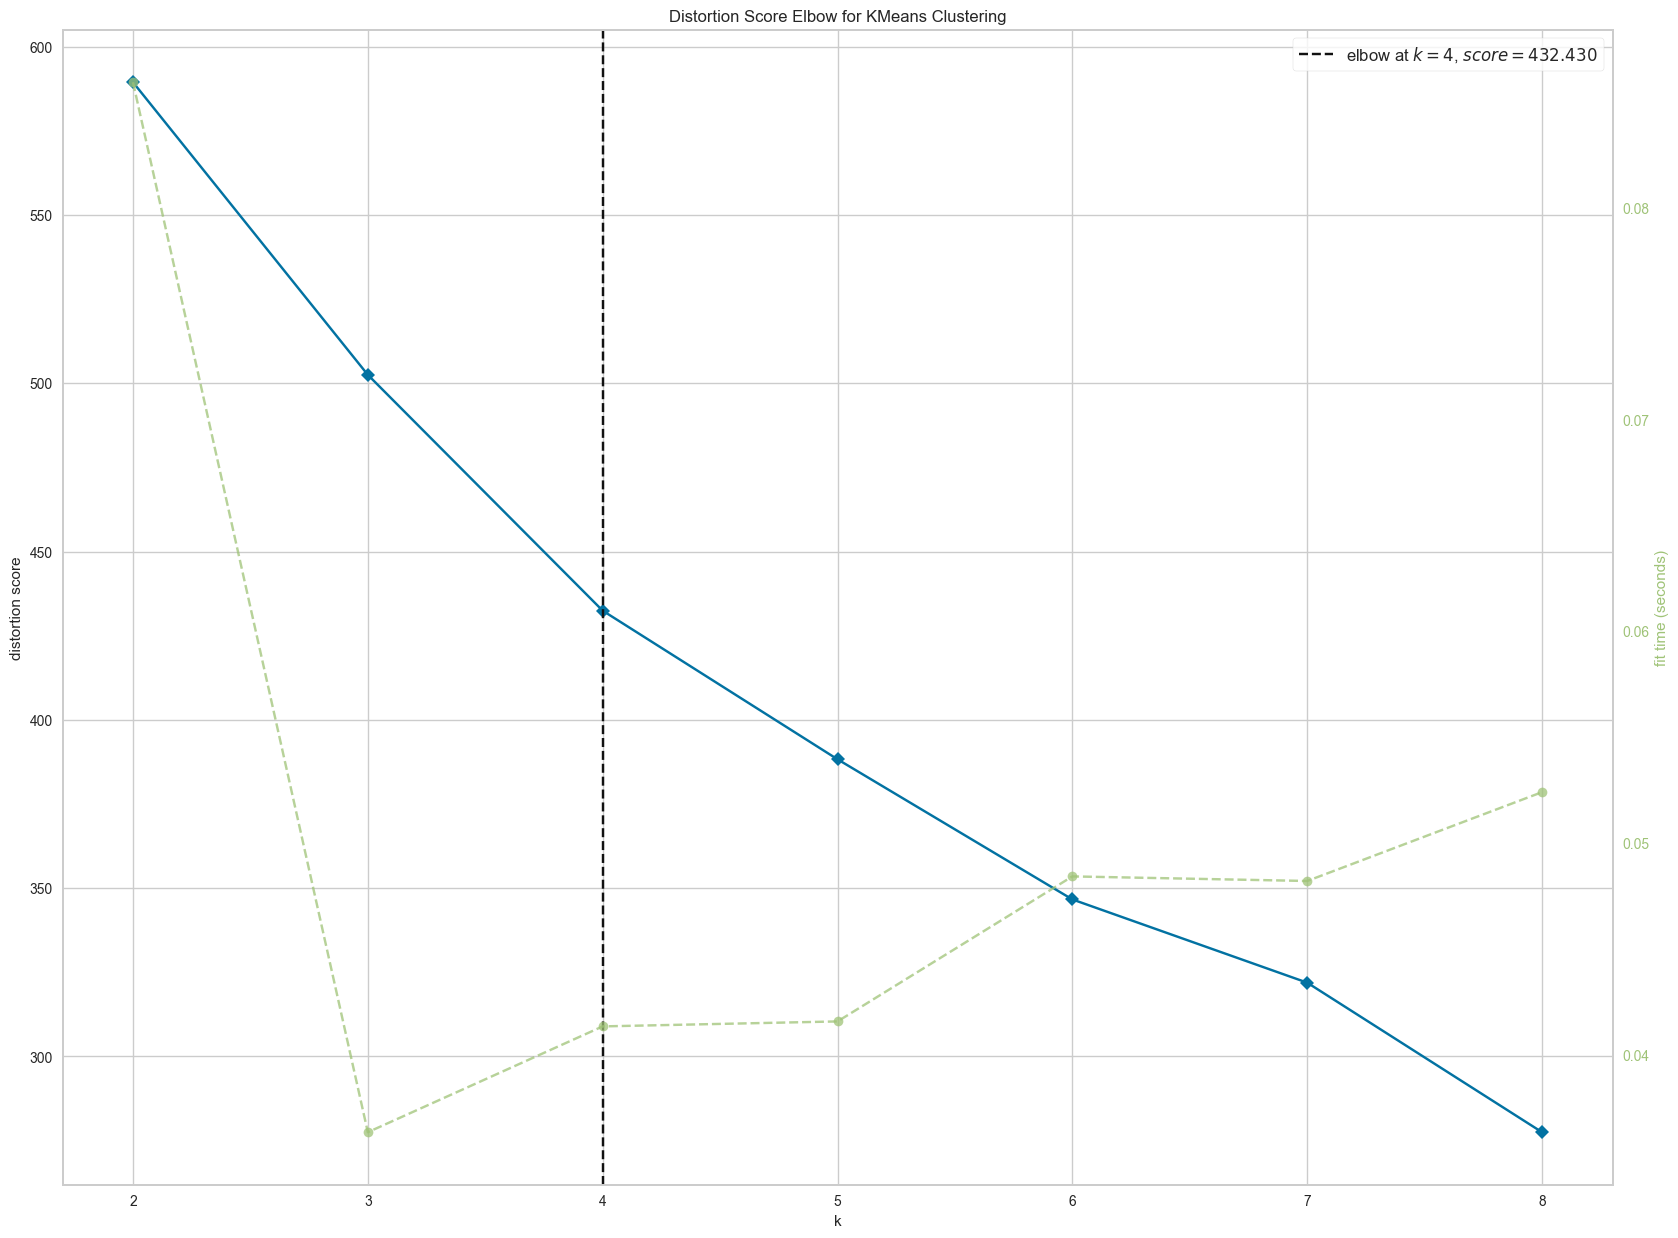

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [142]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)
visualizer.show()


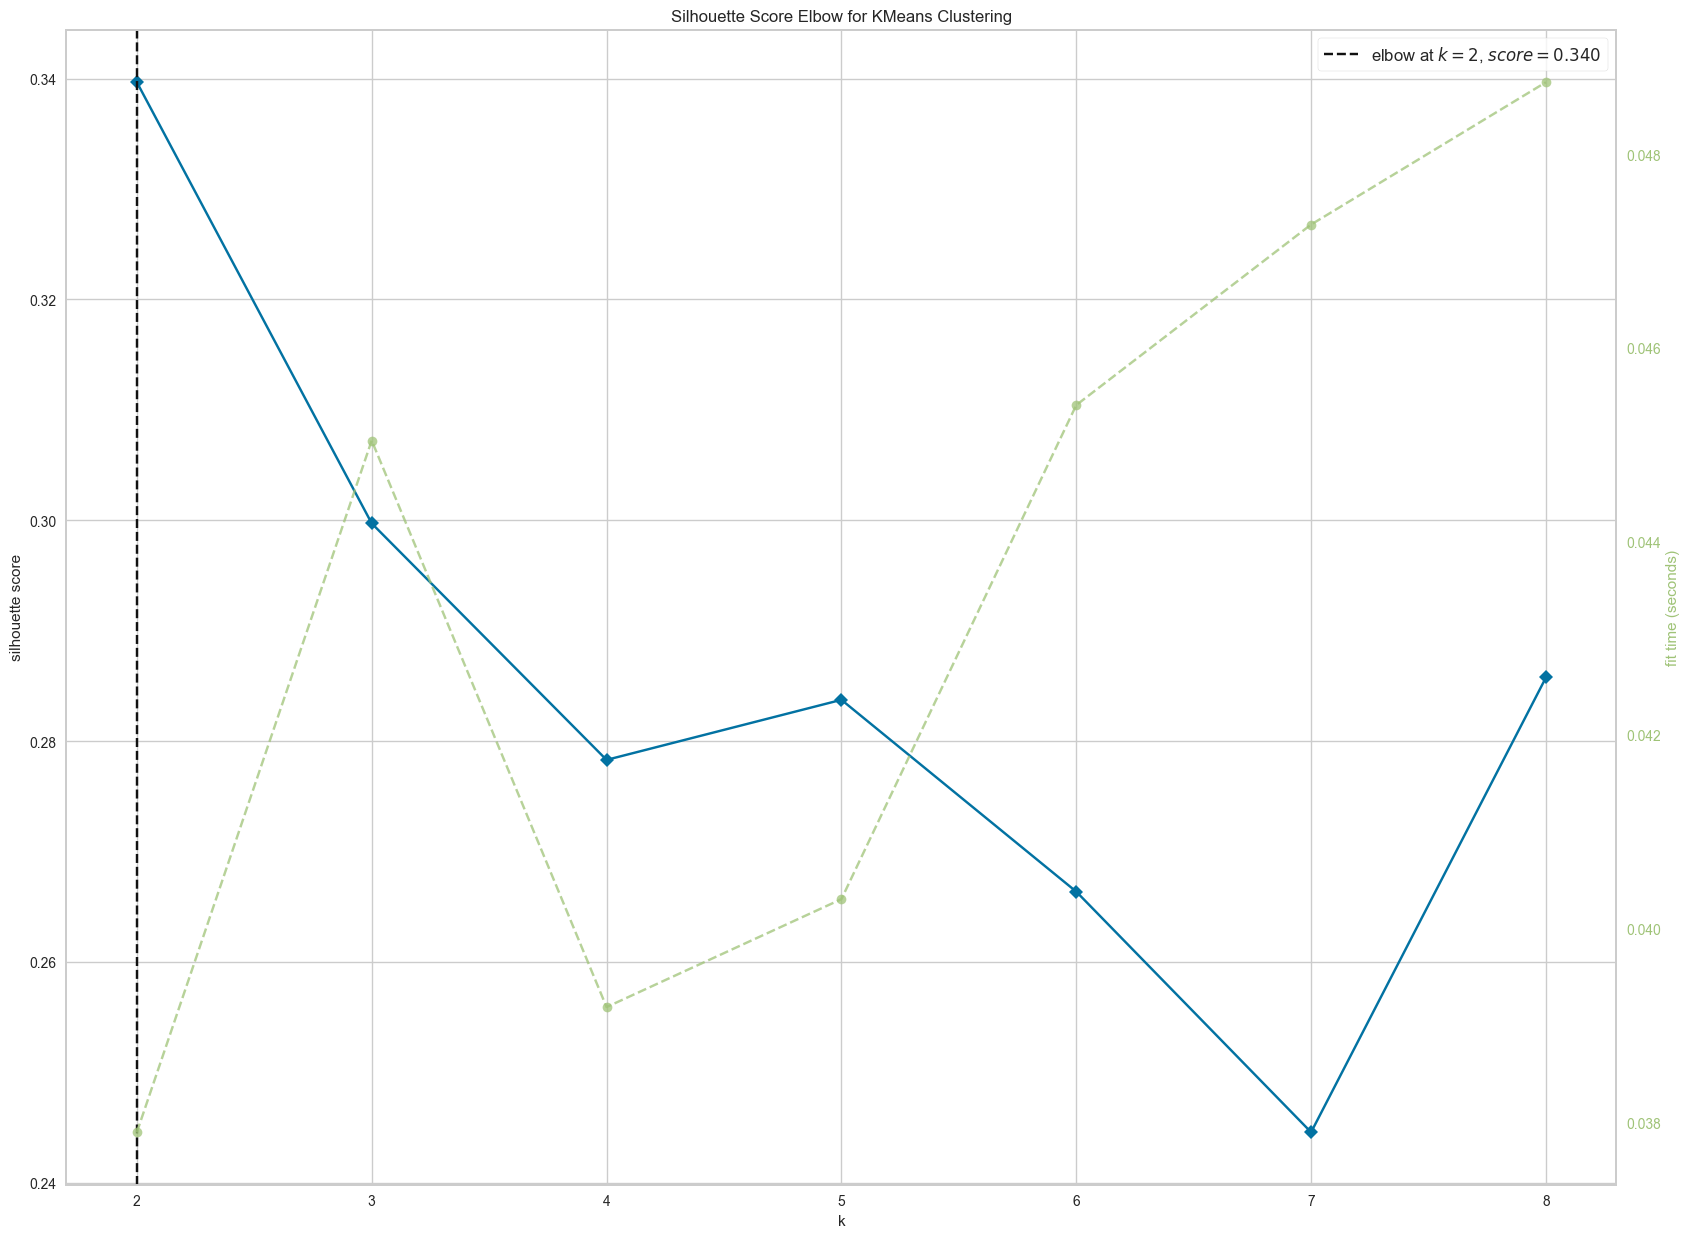

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [143]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)
visualizer.show()

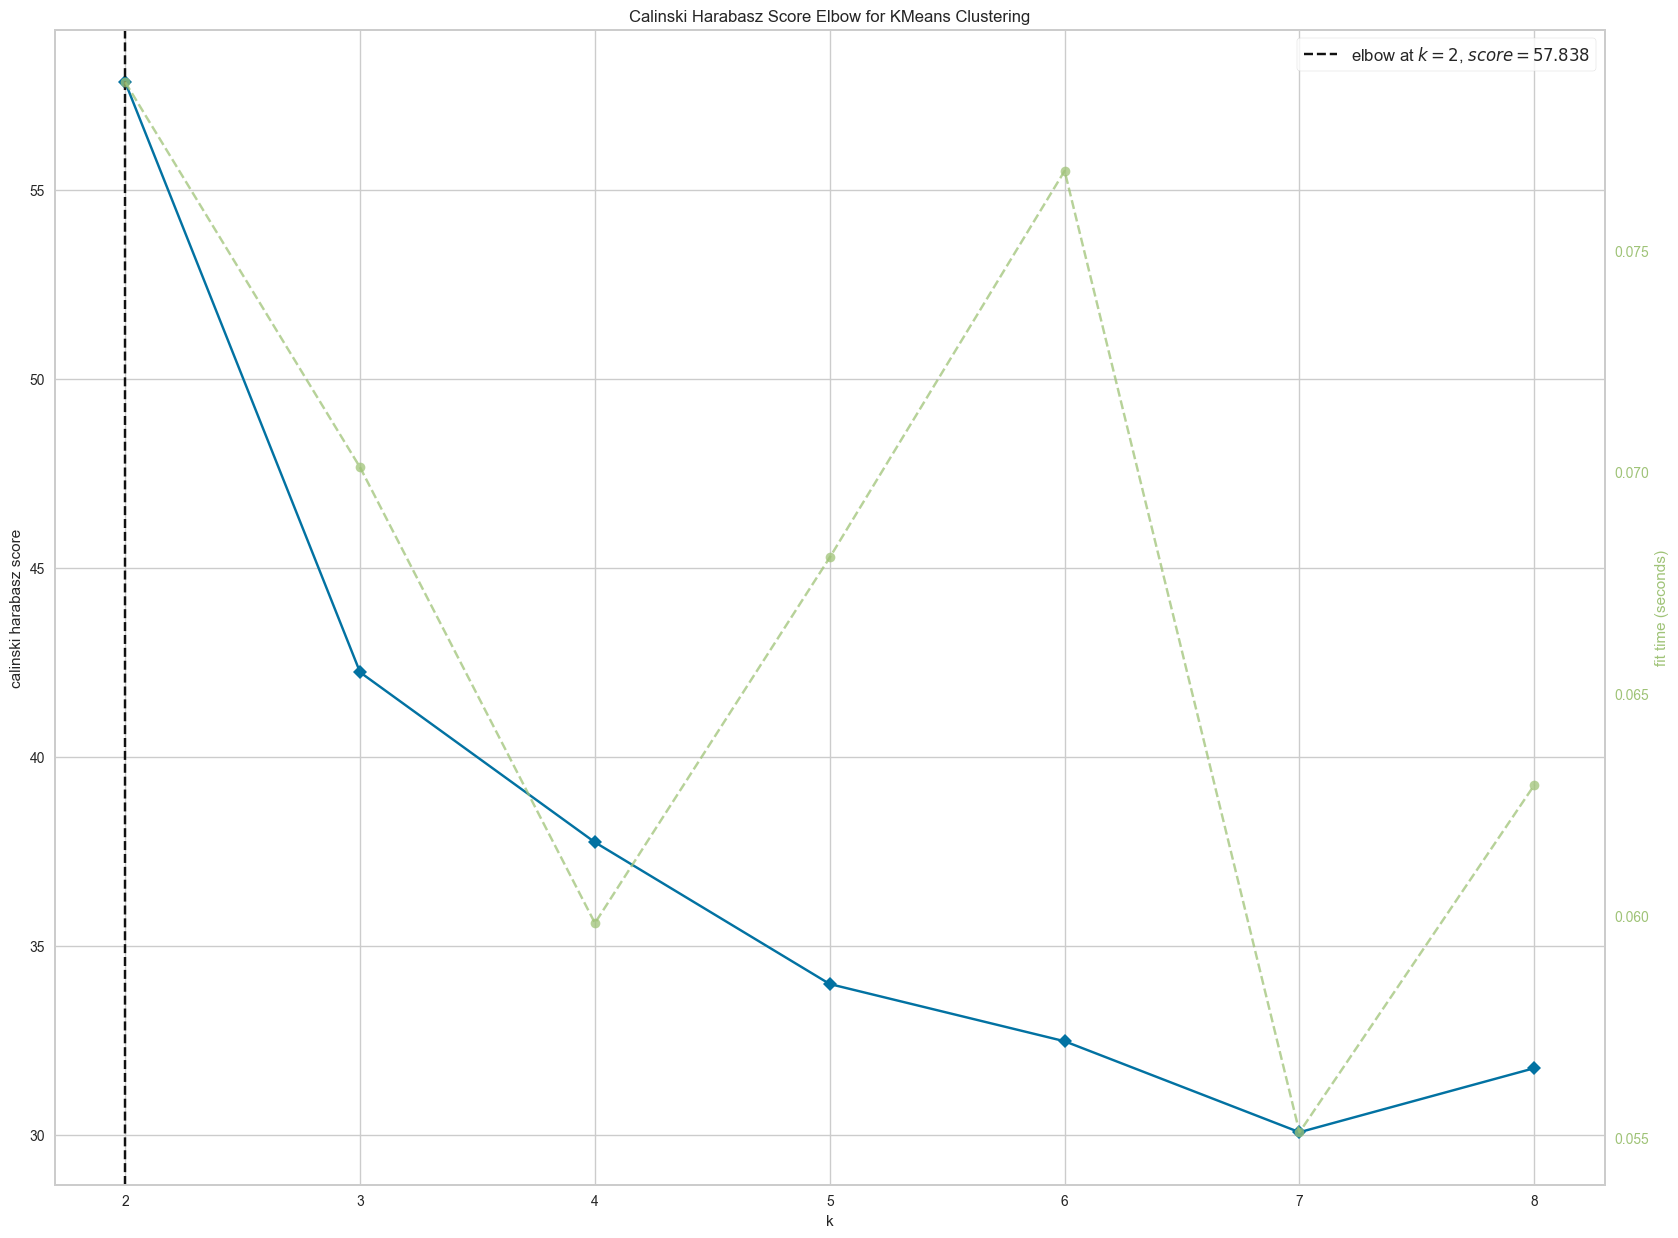

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [144]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)
visualizer.show()

In [145]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_)
print (kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]
427.8874684517357
5
[[ 3.38081 -1.38223 -0.36489  0.10477  0.40601  0.27185  0.242   -0.10662
   0.04313]
 [-1.28035  0.15751 -0.8038   0.03883 -0.26171  0.05765 -0.02518 -0.04843
  -0.00967]
 [ 1.4734   0.75533  0.44439  0.22305  0.00588 -0.20901 -0.0464   0.13708
   0.00747]
 [-2.16662 -0.64972  1.15112 -0.52704  0.2495   0.04766 -0.03575 -0.0585
  -0.02224]]


In [146]:
Counter(kmeans.labels_)

Counter({0: 13, 3: 19, 2: 32, 1: 39})

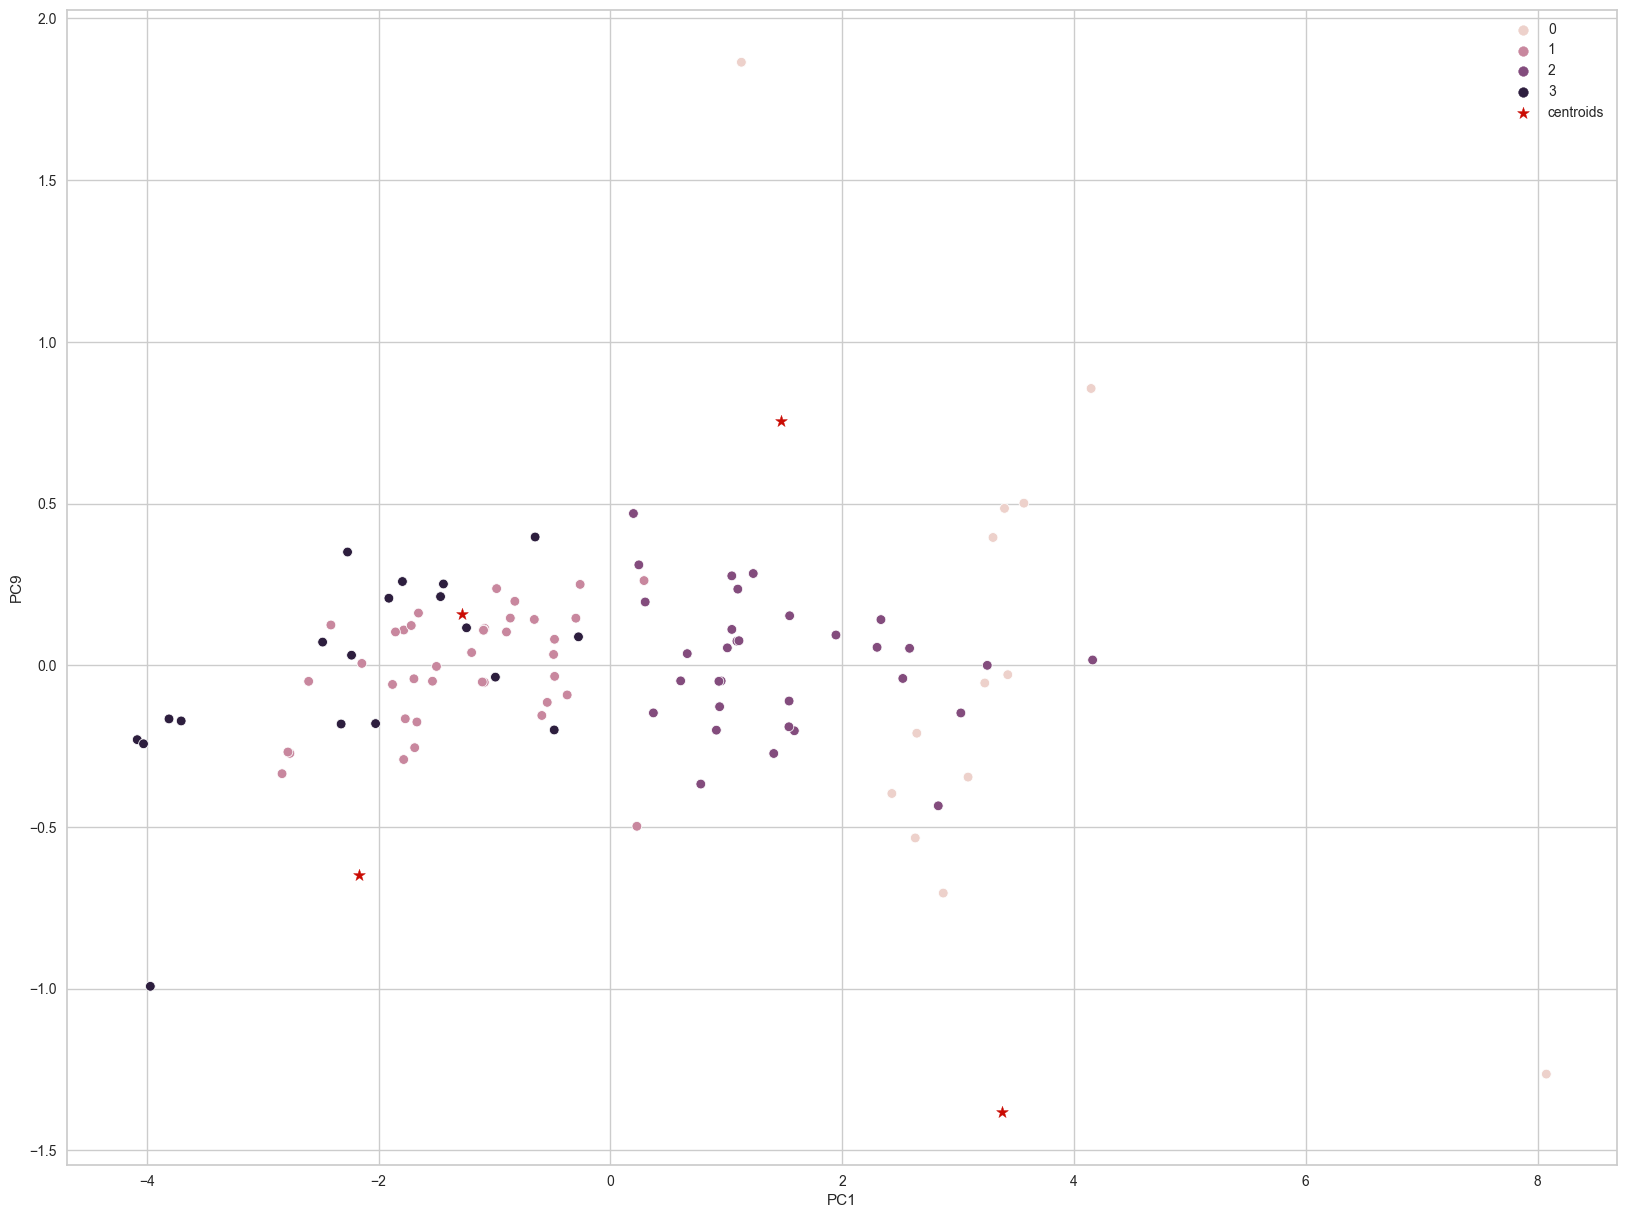

In [149]:
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="*", c="r", s=80, label="centroids")
plt.legend()
plt.show()

Regression for data2

In [150]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['inr(10e3)']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [152]:
print(lm.intercept_)

4643.522050485438


In [153]:
lm.coef_

array([ 1101.58721,  -741.20904,   208.53617,   508.32246,   122.3533 ,
        1579.00686,   333.61147, -1079.99512,  1461.72269])

In [154]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [155]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

Coeff
PC1  1101.5872
PC2  -741.2090
PC3   208.5362
PC4   508.3225
Pc5   122.3533
PC6  1579.0069
PC7   333.6115
PC8 -1079.9951
PC9  1461.7227

In [156]:
y_test

37    3744.0000
1     2496.0000
69    5233.2800
80    3243.7184
92    3064.8384
61    5459.5840
85    2903.6800
53    3328.0000
88    3952.0000
32    2594.5088
6     2654.0800
71    3744.0000
43    2041.2288
16   15040.9792
50    6609.8240
31    3170.3360
97    4451.2000
14    2866.9888
25    3744.0000
51   17888.0000
21    4877.1840
3     5660.9280
84    5876.4992
57    2062.5280
48   12396.8000
47    8565.0240
79   12338.6432
58    3328.0000
2     4695.8080
13    5408.0000
45    3064.8384
89    3120.0000
41    2826.3872
23   10400.0000
26    2745.6000
22    2912.0000
94    3153.2800
27    5028.3584
20    2424.9472
66    2766.0672
30    5604.1856
35    3098.1184
Name: inr(10e3), dtype: float64

In [158]:
predictions=lm.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [159]:
y_test

37    3744.0000
1     2496.0000
69    5233.2800
80    3243.7184
92    3064.8384
61    5459.5840
85    2903.6800
53    3328.0000
88    3952.0000
32    2594.5088
6     2654.0800
71    3744.0000
43    2041.2288
16   15040.9792
50    6609.8240
31    3170.3360
97    4451.2000
14    2866.9888
25    3744.0000
51   17888.0000
21    4877.1840
3     5660.9280
84    5876.4992
57    2062.5280
48   12396.8000
47    8565.0240
79   12338.6432
58    3328.0000
2     4695.8080
13    5408.0000
45    3064.8384
89    3120.0000
41    2826.3872
23   10400.0000
26    2745.6000
22    2912.0000
94    3153.2800
27    5028.3584
20    2424.9472
66    2766.0672
30    5604.1856
35    3098.1184
Name: inr(10e3), dtype: float64

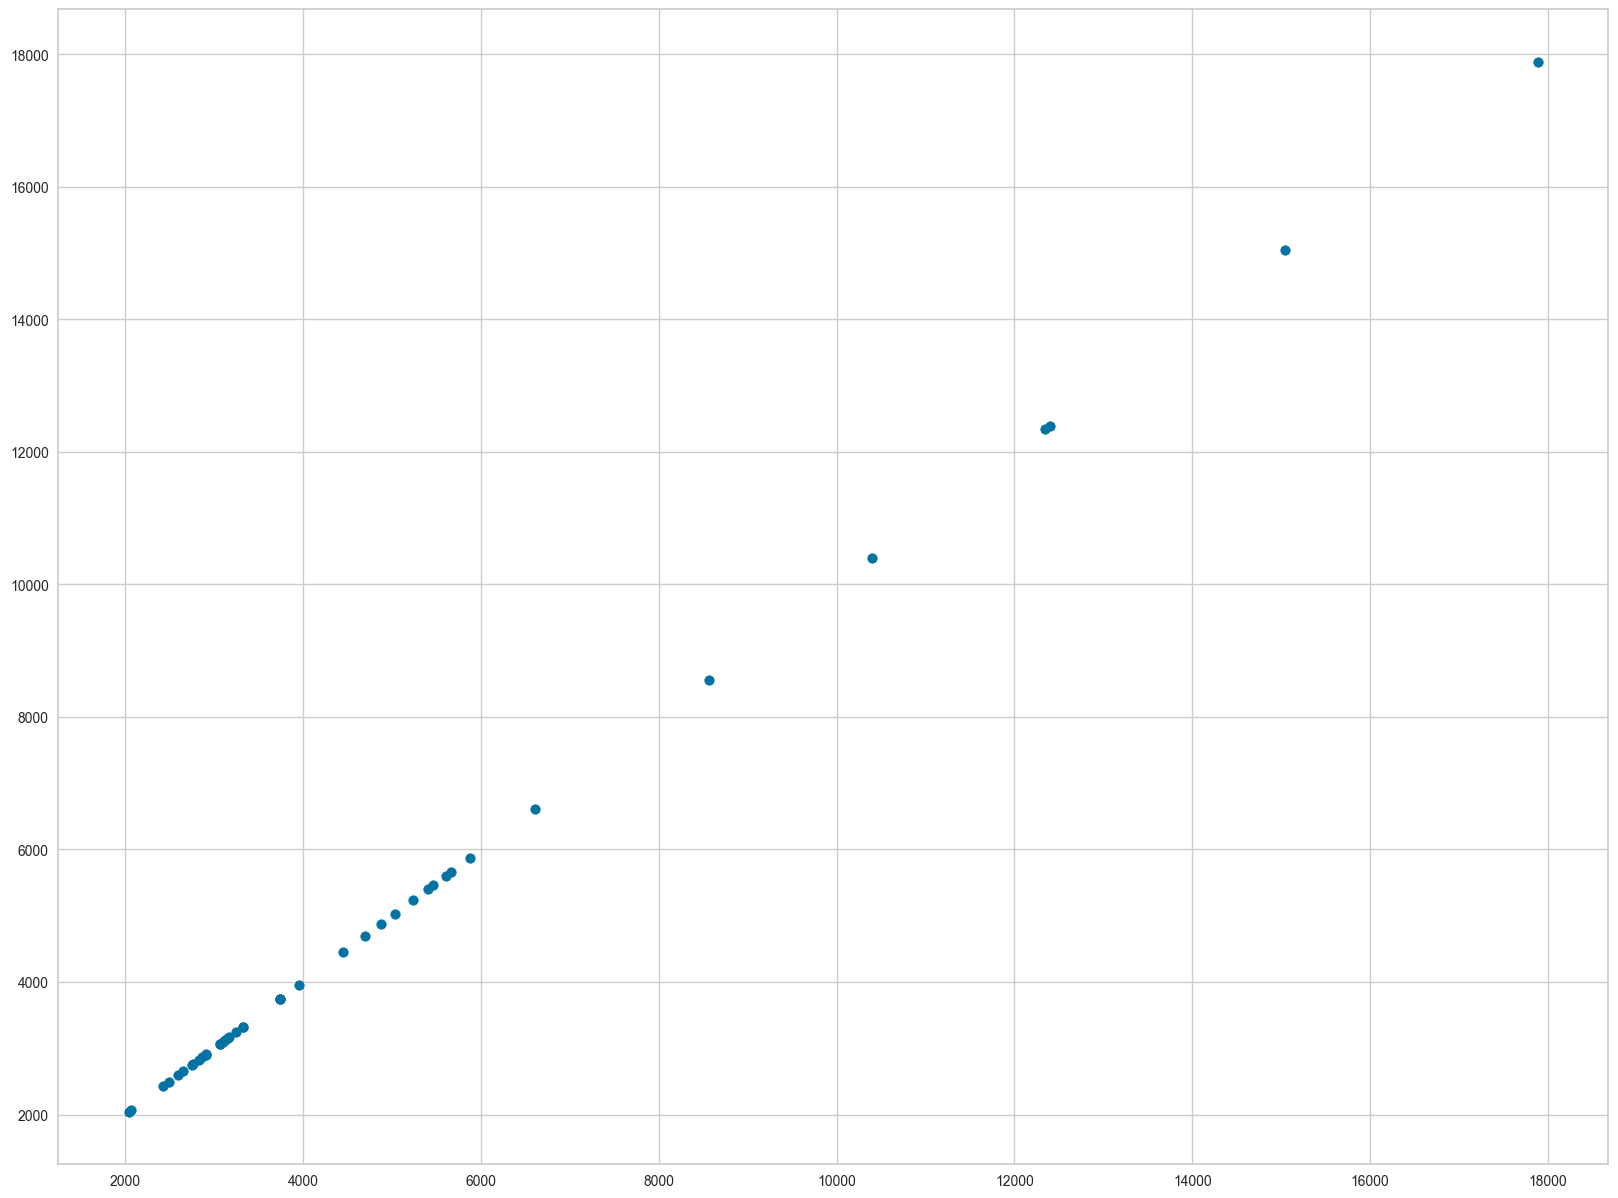

In [160]:
plt.scatter(y_test, predictions)

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<Axes: xlabel='inr(10e3)', ylabel='Density'>

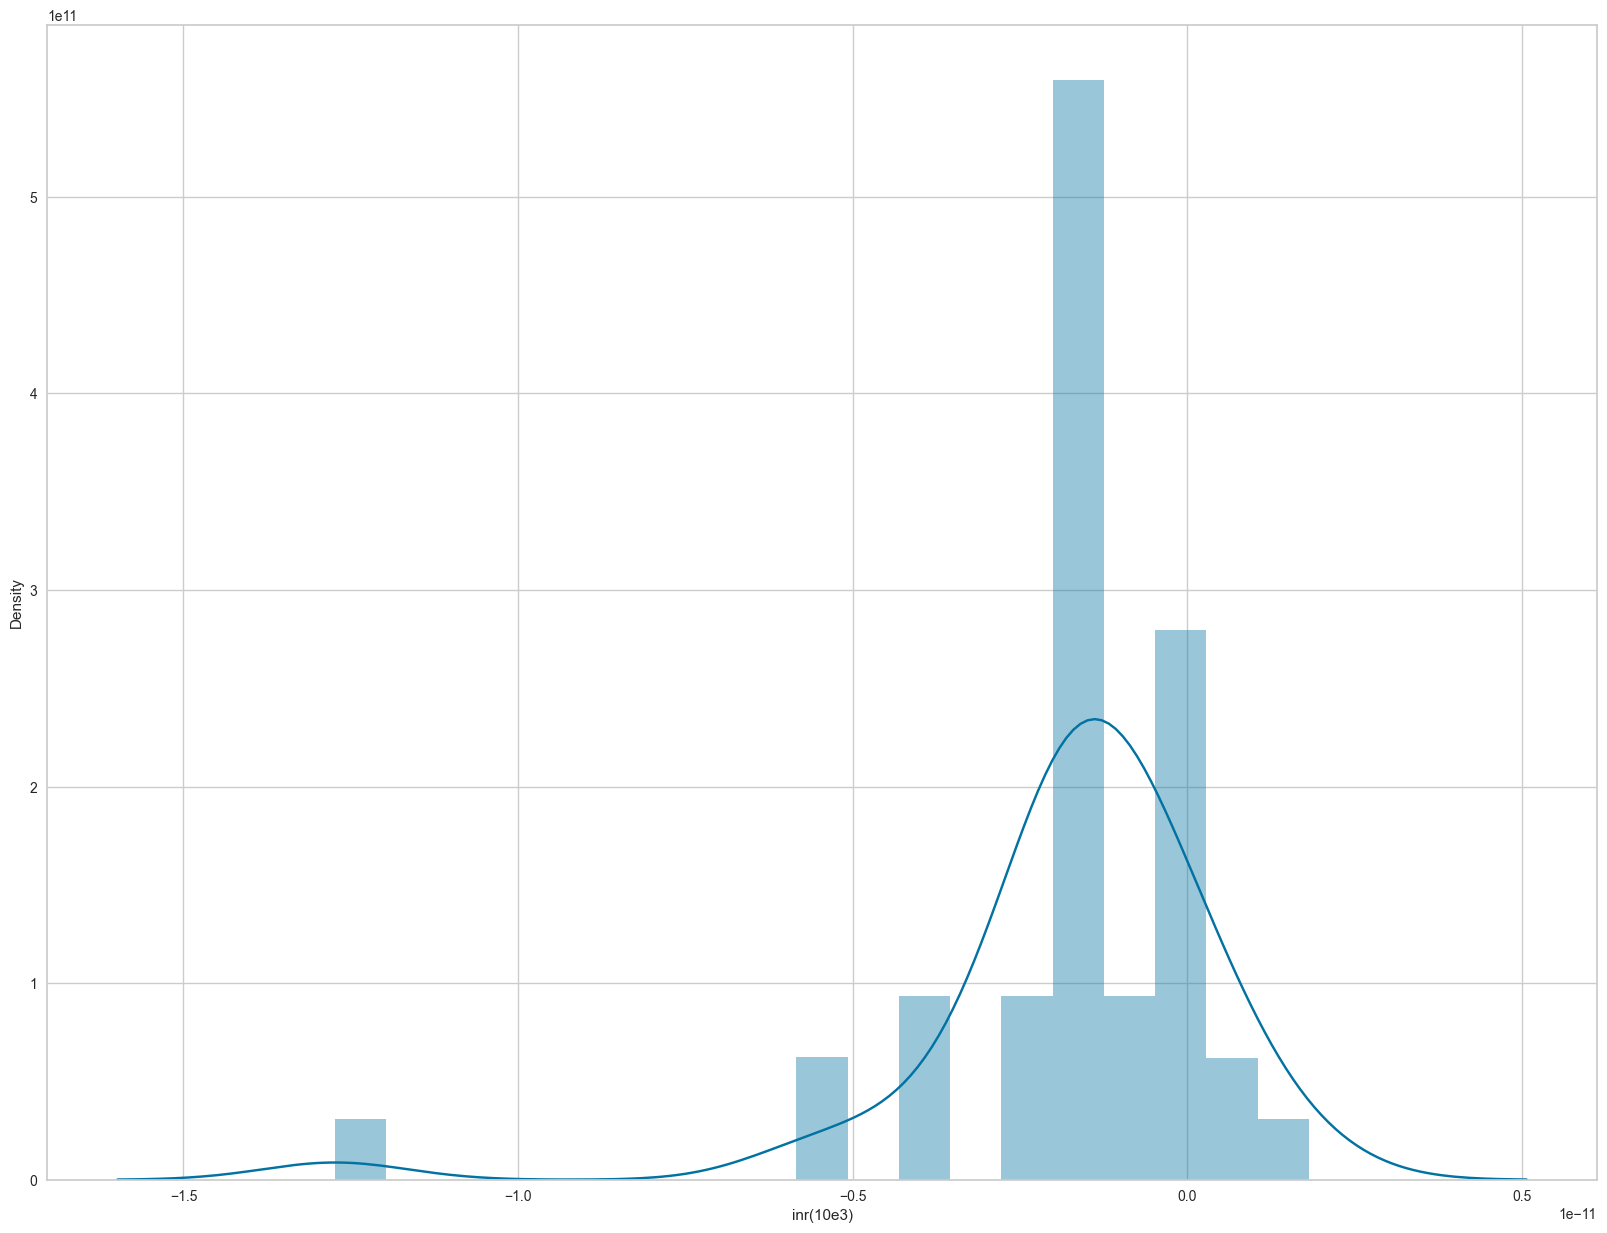

In [162]:
sns.distplot((y_test-predictions))

In [163]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE: 1.8839533108153515e-12
MSE: 8.045316195902662e-24
RMSE: 2.836426659708067e-12


In [164]:
metrics.mean_squared_error(y_test,predictions)

8.045316195902662e-24

In [165]:
metrics.mean_absolute_error(y_test,predictions)

1.8839533108153515e-12

In [166]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2.836426659708067e-12

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



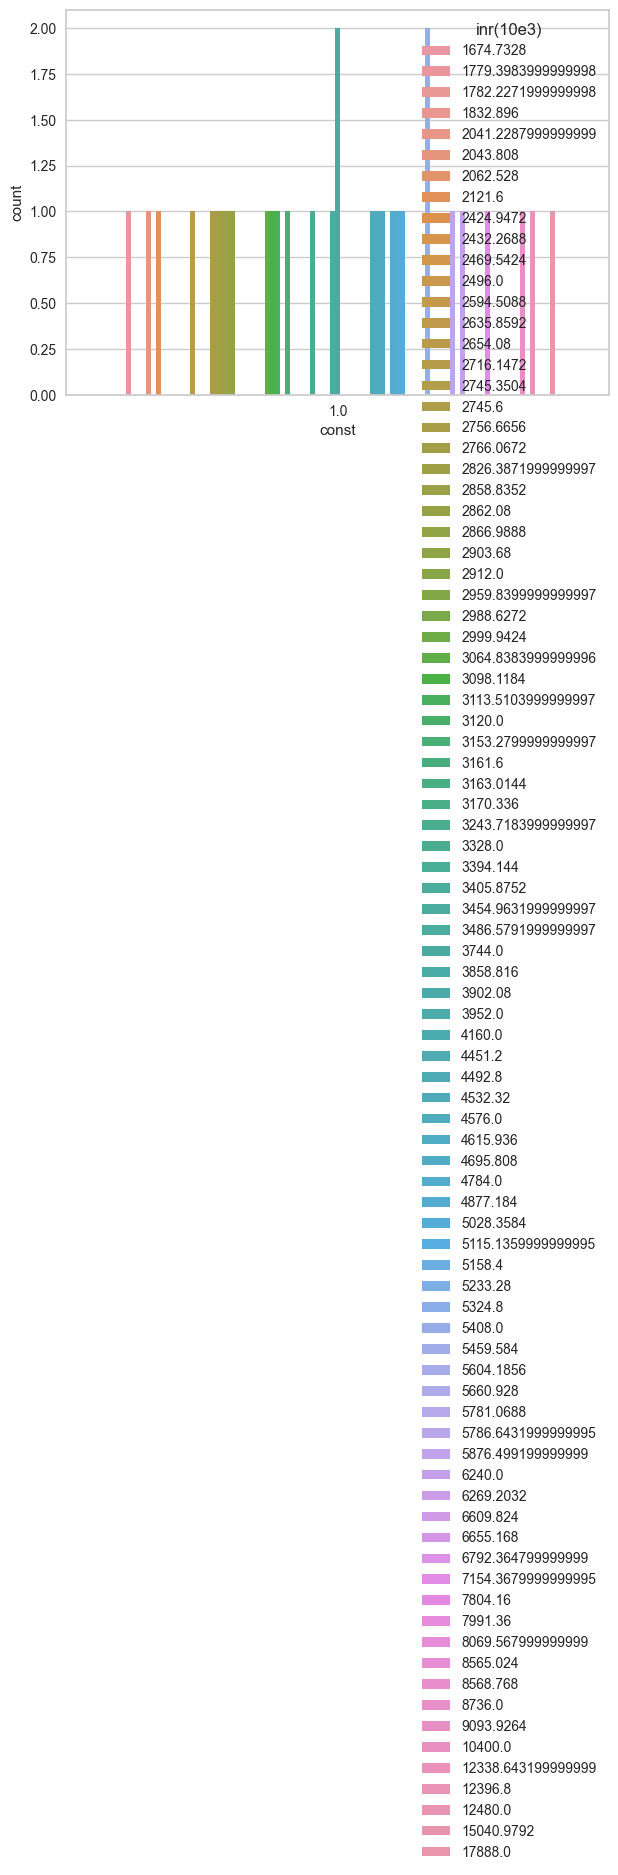

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



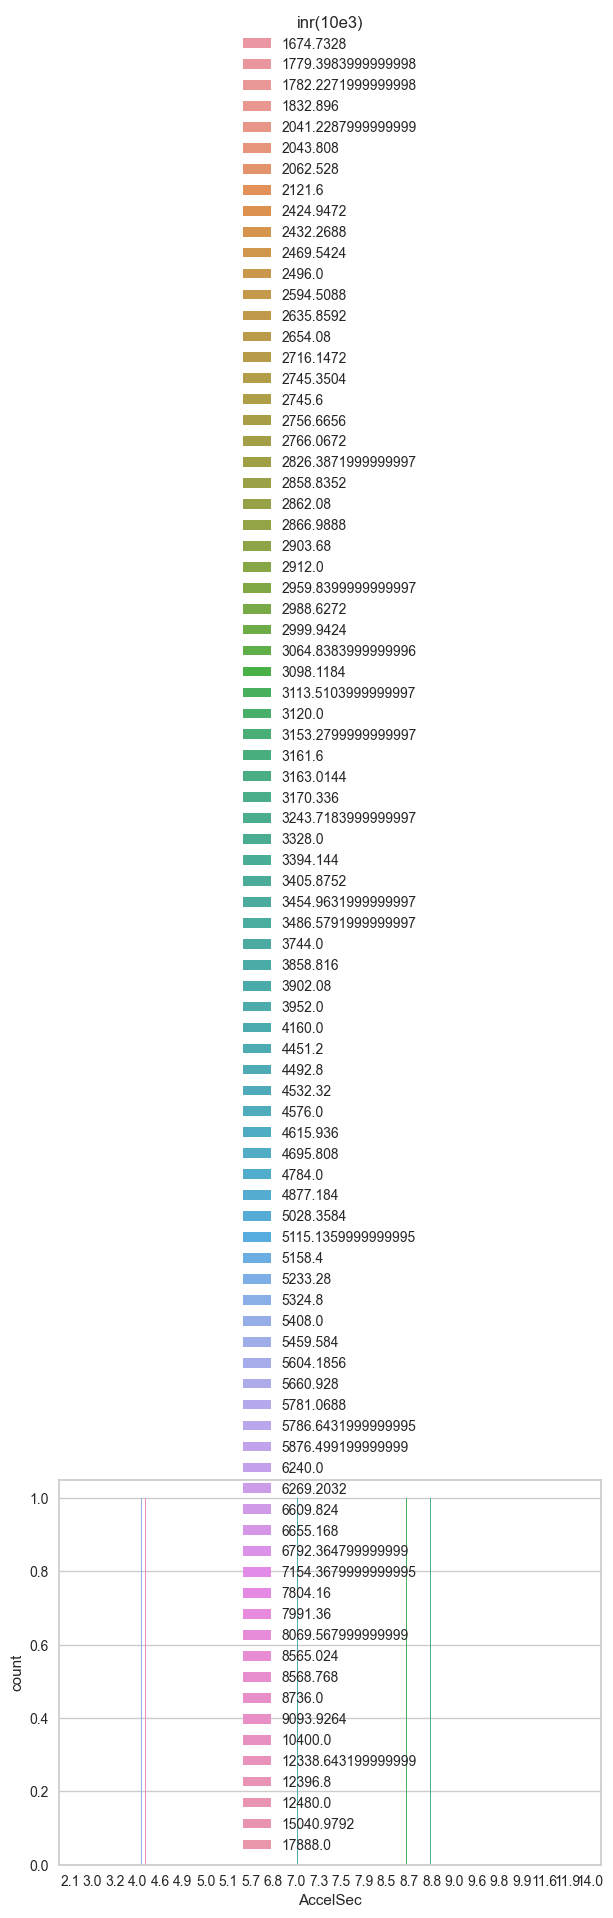

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



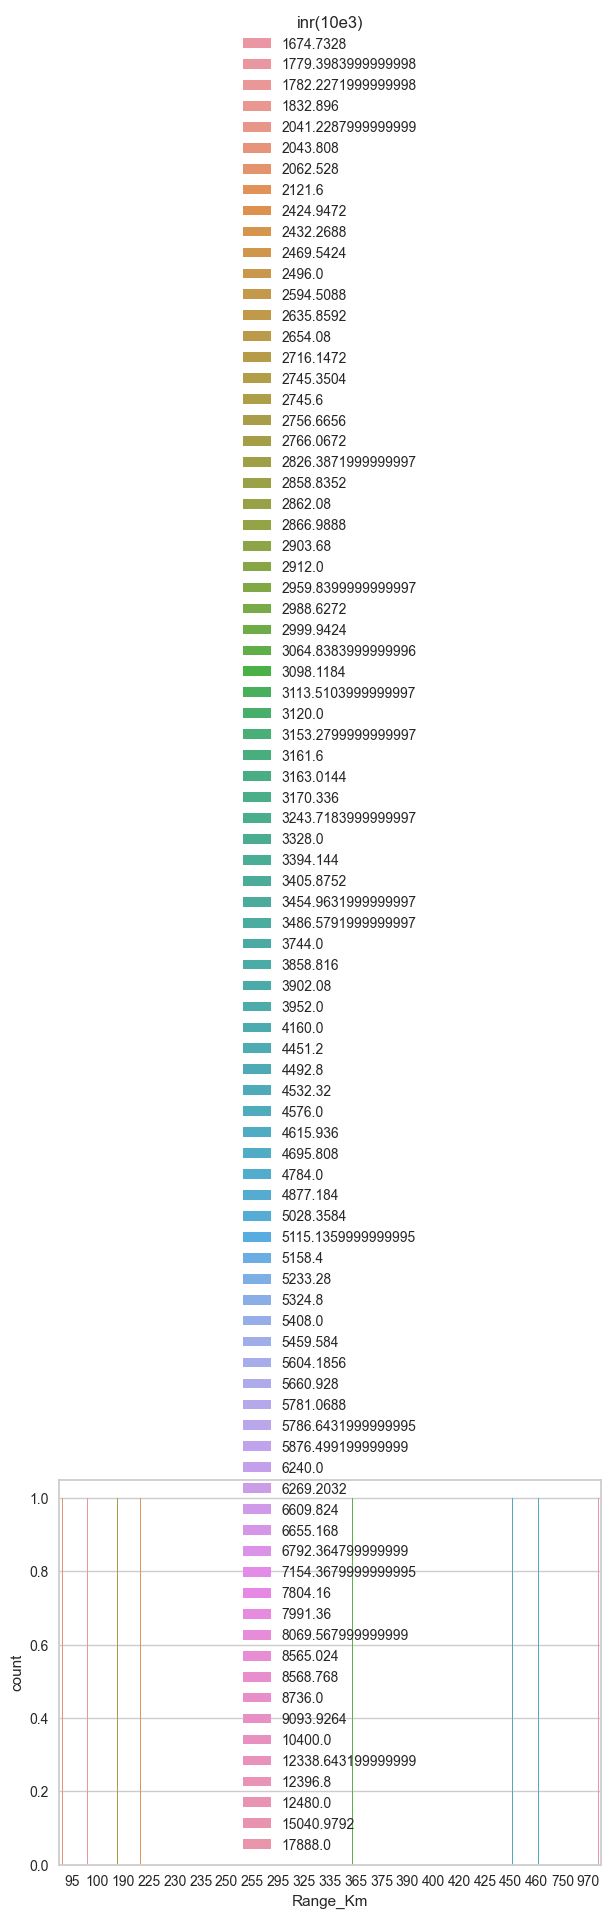

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



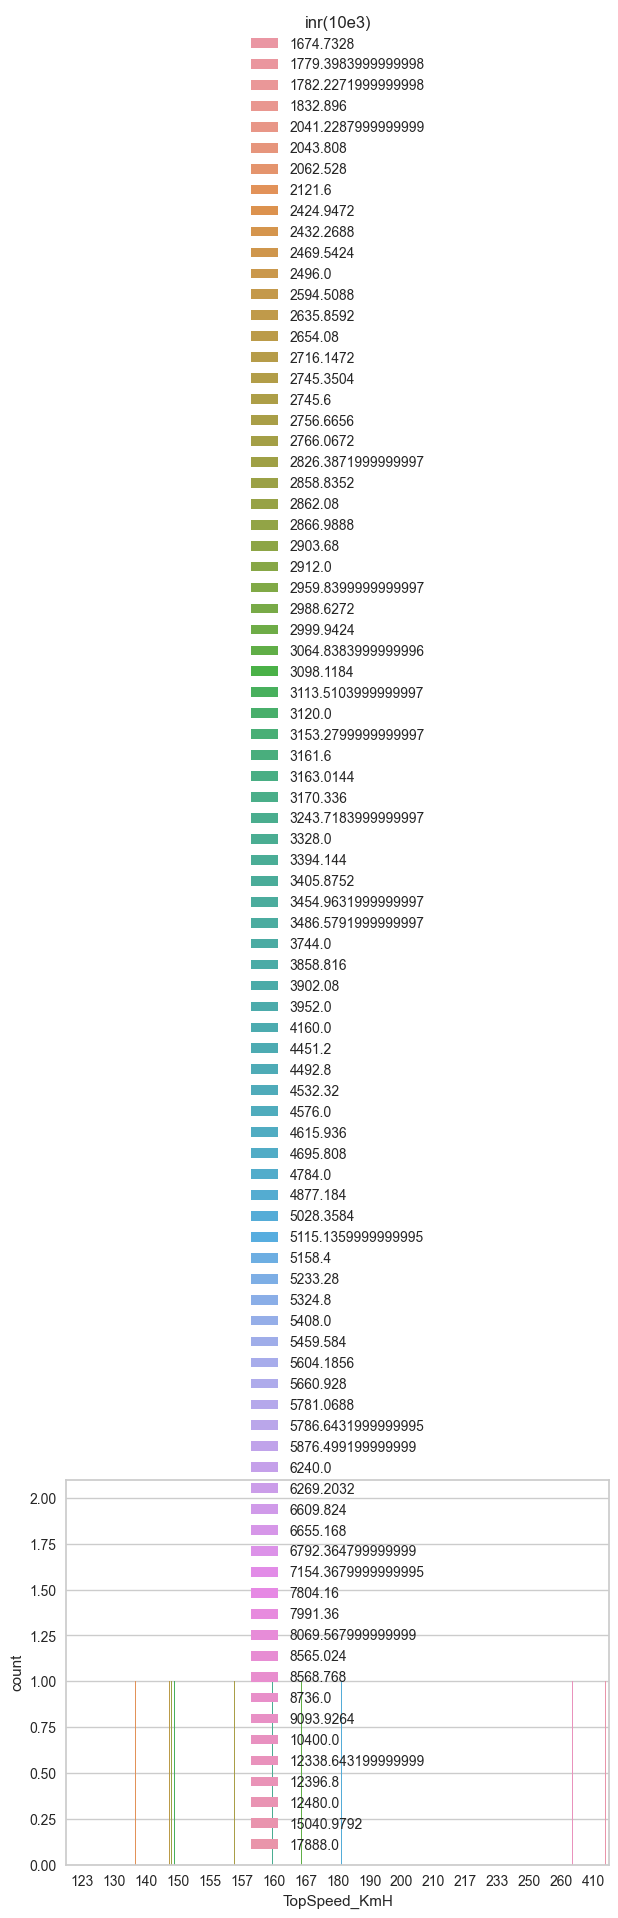

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



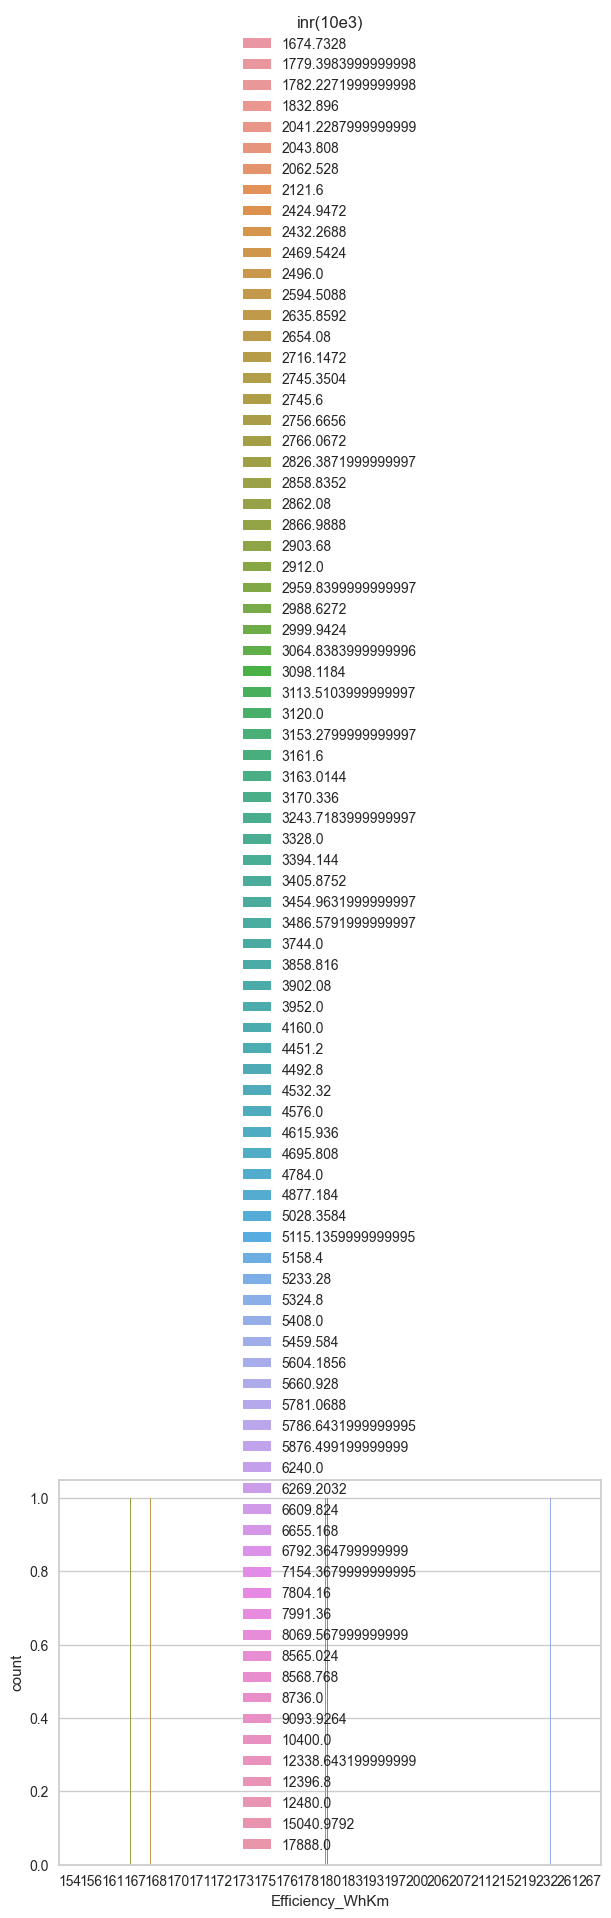

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



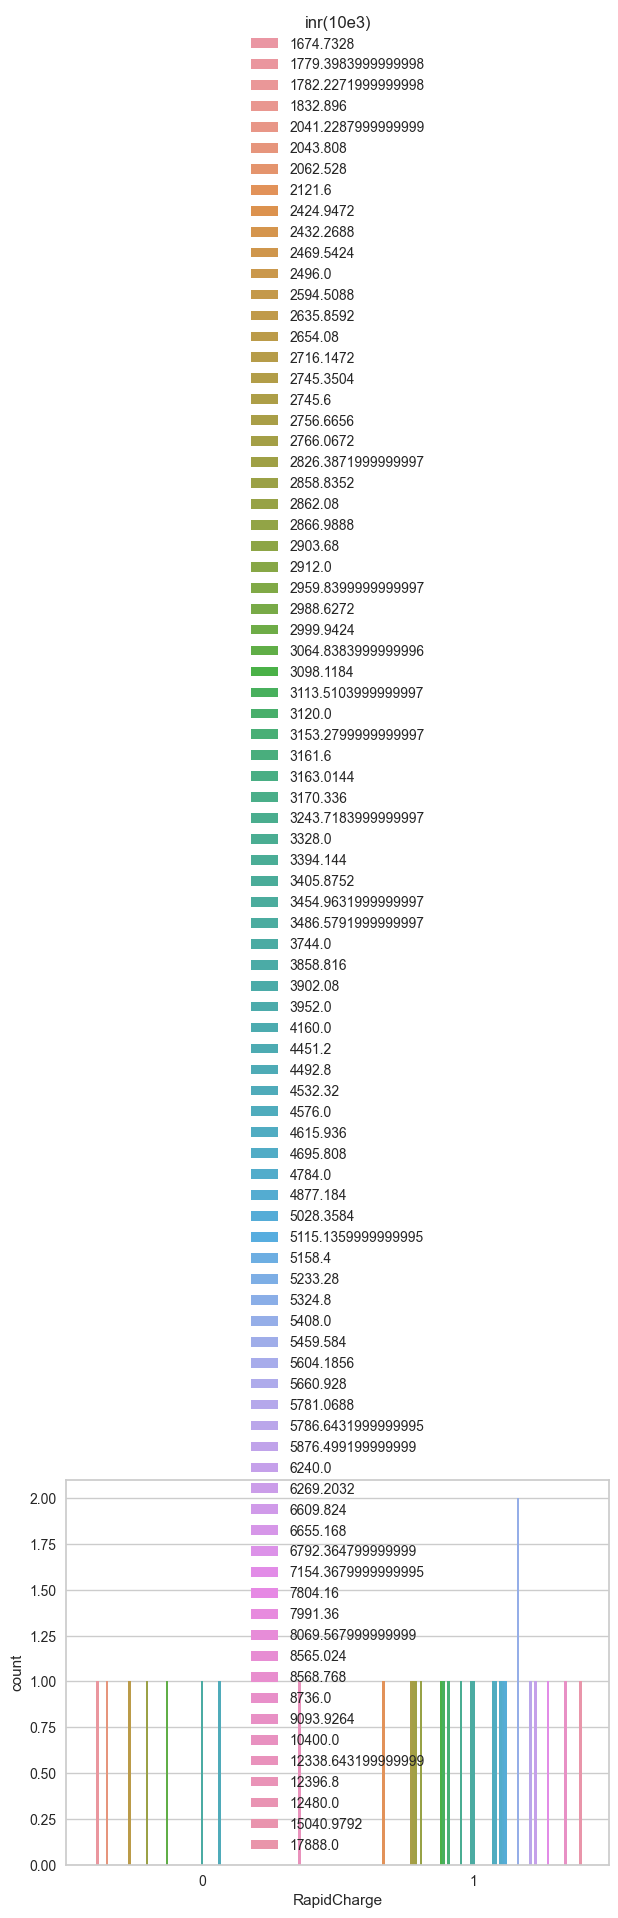

In [167]:
for i in x_test_rfe:
        plt.figure(figsize=(7,5))
        sns.countplot(x_test_rfe[i],hue=df1['inr(10e3)'])
        plt.show()

In [168]:
x_train_rfe.columns

Index(['const', 'AccelSec', 'Range_Km', 'TopSpeed_KmH', 'Efficiency_WhKm',
       'RapidCharge'],
      dtype='object')